# Instrumental VEI

In this tutorial, we will attempt to draft an instrumental (seismic) VEI scale. One scale will be based on Reduced Displacement, another will use Energy Magnitude directly, and the third will be based on modelling volcanic events by a single force. First, some background on these.


# 1. Reduced Displacement

Reduced Displacement ($D_R$) is a measurement for comparing the sizes of different seismic signals, such as those corresponding to volcanic eruptions and lava dome collapses.

Seismometers are (usually) velocity transducers - they generate an electric signal (in Volts) that is proportional to the velocity of ground shaking within a certain passband. Outside that passband, the seismometer no longer generates a voltage proportional to ground velocity. This voltage signal has to be digitized (using an analog-to-digital converter built into the datalogger or on a computer at the observatory), converting the signal units from Volts to digitizer "Counts" before it can be examined on a computer. This is a raw seismic signal. To convert this raw seismic signal to a velocity seismogram, we must "remove the instrument response". Then by carefully integrating the velocity seismogram, we will have a displacement seismogram. So we have raw, velocity, and displacement, seismograms.

RSAM is just one of several related downsampled seismic measurements. Some others supported by the `SAM` package are:

<table>
    <tr><th>Acronym</th><th>Full name</th><th>Computed from a:</th><th>Instrument corrected?</th><th>Geometrically corrected?</th></tr>
    <tr><td>RSAM</td><td><b>Real-time (or Raw) Seismic Amplitude Measurement</b></td><td>Raw seismogram</td><td>N</td><td>N</td></tr>
    <tr><td>VSAM</td><td>Velocity Seismic Amplitude Measurement</td><td>Velocity seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>DSAM</td><td>Displacement Seismic Amplitude Measurement</td><td>Displacement seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>RSEM</td><td>Raw Seismic Energy Measurement</td><td>Raw seismogram</td><td>N</td><td>N</td></tr>   
    <tr><td>VSEM</td><td>Velocity Seismic Energy Measurement</td><td>Velocity seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>$V_R$ and $V_{RS}$</td><td>Reduced Velocity</td><td>VSAM</td><td>Y</td><td>Y</td></tr>  
    <tr><td>$D_R$ and $D_{RS}$</td><td><b>Reduced Displacement</b></td><td>DSAM</td><td>Y</td><td>Y</td></tr>   
    <tr><td>$E_R$</td><td><b>Reduced Energy</b></td><td>VSEM</td><td>Y</td><td>Y</td></tr>     
</table>

## 1.1 Correcting for Geometrical Spreading

How do we compare seismograms recorded at different distances from the same volcano? Or from different volcanoes? One thing we can do is to "reduce" the seismograms to a common distance, e.g. 1 km, by correcting for geometrical spreading. This is the idea behind Reduced Displacement. 

Consider a simple half-space velocity model of uniform density. As body waves propagate to greater distances, the wavefront can be thought of as a hemispherical shell, with surface area $2\pi{r}^2$. If energy is not dissipated inelastically or scattered, the energy per unit area must then diminish $1/{r}^2$. And since amplitude is proportional to the square root of energy, the amplitude of body waves diminishes like 1/r. We call this "geometrical spreading".

Similarly, surface waves can be thought of as a circular (or cylindrical) wavefront, whose circumference increases like $2\pi r$, so energy density diminishes like 1/r and surface wave amplitude as $1/\sqrt(r)$.

Reduced Displacement was introduced by Aki & Koyanagi (1981) as a measurement of volcanic tremor amplitude for Kilaeua. Proportional to seismic moment rate, it is the RMS amplitude of a displacement seismogram, corrected for geometrical spreading. 

For body waves:

$D_{R} = rms(U) r$

where r = distance from source to station, U = displacement

Beyond a few wavelengths, surface waves dominate, and Fehler (1983) determined:

$D_{RS} = rms(U) \sqrt{r \lambda}$

In a series of papers McNutt (1994; 2005; 2008) demonstrated scaling relationships for explosive volcanic eruptions between Reduced Displacement and:
- ash column height
- Volcanic Explosivity Index (Newhall and Self, 1982)
- cross-sectional area of volcanic vent

RSAM is generally more useful for seismic field engineers, because it is unfiltered. Reduced Displacement is generally more useful for scientists, as it is a measurement that can be compared from station to station, even on different volcanoes. 

References:

- Aki, K., Koyanagi, R.Y., 1981. Deep volcanic tremor and magma ascent mechanism under Kilauea, Hawaii. J. Geophys. Res. 86, 7095–7110.
- Fehler, M., 1983. Observations of volcanic tremor at Mount St. Helens Volcano. J. Geophys. Res. 88, 3476–3484.
- McNutt, S.R., 1994. Volcanic tremor amplitude correlated with the Volcanic Explosivity Index and its potential use in determining ash hazards to aviation. Acta Vulcanol. 5, 193–196.
- McNutt, S.R., Nishimura, T., 2008. Volcanic tremor during eruptions: Temporal characteristics, scaling and constraints on conduit size and processes. J. Volcanol. Geotherm. Res., 178, 1, 10-18. https://doi.org/10.1016/j.jvolgeores.2008.03.010.
- Newhall, C.G., Self, S., 1982. The volcanic explosivity index (VEI): an estimate of explosive magnitude for historical volcanism. J. Geophys. Res. 87, 1231–1238.

## 1.2 Computing Reduced Displacement

DSAM is just an instrument-corrected version of RSAM, and $D_R$/$D_{RS}$  is just DSAM corrected for geometrical spreading, and so SAM.py was written to support all these different measurements. Here is an algorithm:

1. Load raw seismic data as an ObsPy Stream object.
2. Load station/instrument response metadata from a StationXML file into an Obspy Inventory object.
3. Remove instrument response to convert Stream object to a displacement seismogram.
4. Compute DSAM data from this displacement seismogram. 
6. Define a fixed source location.
7. Compute distance from station to source (done internally using source and inventory)
8. "Reduce" the DSAM object by multiplying by geometrical spreading correction.

# 2. Energy Magnitude

Ampitude measurements, such as RSAM and Reduced Displacement, do not effectively capture the size of an event because some events of equal amplitude may be of very different durations. So it is useful to estimate the energy of the event. Furthermore, because event energy can range of several orders of magnitude, it is useful to define an energy magnitude.

We compute Reduced Energy ($E_R$, units: J) via the equation:

$E_R = 2 \pi r^{2}  \frac{\rho_{E} c_{E}}{A} \int {S^{2} {U(t)}^2} dt$

(Boatwright, 1980; Johnson and Aster, 2005). 

Since this includes a correction for geometrical spreading, we will call it Reduced Energy ($E_{R}$).

The quantity ---- is similar to RSEM (Real-time Seismic Energy Measurement) but computed on a velocity seismogram rather than a raw seismogram, so we call it VSEM.

And then following Hanks and Kanamori (1???), we define Energy-Magnitude ($M_{E}$) as:

(Started doing this in March 2000 at Montserrat Volcano Observatory... lots of complaints!)

$M_{E} = \frac{2}{3} log_{10} E_R - 3.2$

(The factor 3.2 might change depending on velocity structure).

We will now compute $E_{R}$ and $M_{E}$ for the same events we examined in the Reduced Displacement tutorial.

References:

- Boatwright, 1980
- & Boatright, 1995 (original Energy Magnitude definition)
- Johnson & Aster, 2005
- VSEM?
- Hanks and Kanamori, 1980?

## 2.1 Computing Reduced Energy ($E_R$)

DSAM is just an instrument-corrected version of RSAM, and Reduced Displacement is just DSAM corrected for geometrical spreading, and so SAM.py was written to support all these different measurements. Here is an algorithm:

1. Load raw seismic data as an ObsPy Stream object.
2. Load station/instrument response metadata from a StationXML file into an Obspy Inventory object.
3. Remove instrument response to convert Stream object to a displacement seismogram.
4. Compute DSAM data from this displacement seismogram. 
6. Define a fixed source location.
7. Compute distance from station to source (done internally using source and inventory)
8. "Reduce" the DSAM object by multiplying by geometrical spreading correction.

# 3. Single Force

A vertically-directed volcanic explosion can be modelled as a single force using moment tensor representation. Similarly, a directed blast can be modelled as a titled or horizontal single force. Felix Cardozo plans to make some estimates with MTUQ, and just needs instrument-corrected (displacement) seismograms.

# 4. Methodology

## Functions

In [ ]:
import os
import sys
#import glob
import numpy as np
import pandas as pd
import obspy
sys.path.append('lib')
import dataframe_tools as DFT
from DFT import wrapper
from SAM import DSAM, VSEM, DR, DRS

from math import log10, floor
def sigfigs(x, n=2):
    if x==0:
        return 0
    else:
        return round(x, n-int(floor(log10(abs(x))))-1)


# Load raw seismic data - and set units accordingly
DATA_DIR = os.path.join('data')
SDS_DIR = os.path.join(DATA_DIR, 'continuous','SDS')
SAM_DIR = os.path.join(DATA_DIR, 'continuous','SAM')
RESPONSE_DIR = os.path.join(DATA_DIR, 'responses')

# Load raw seismic data - and set units accordingly
SDS_DIR = os.path.join('/data', 'SDS')
#SAM_DIR = os.path.join(DATA_DIR, 'continuous','SAM')
RESPONSE_DIR = os.path.join('data', 'responses')

#resultsDF = pd.DataFrame(columns=['Event', 'sum(ER)', 'ME', 'sum(ER_VLP)', 'ME_VLP', 'DR', 'DR_VLP', 'DRS', 'DRS_VLP', 'M_DR', 'M_DR_VLP', 'M_DRS', 'M_DRS_VLP'])

resultsDF = pd.DataFrame(columns=['Event', 'start', 'end', 'duration', 'ML', 'sum(ER)', 'ME', 'DR', 'DRS']) #,  'M_DR',  'M_DRS'])



# 5. Events

## 5.1 Event 1: Boxing Day Collapse 1997, Montserrat

29 months into the eruption of the Soufriere Hills Volcano, Montserrat, part of the crater wall the lava dome was growing within (and overtopping) suddenly collapsed in a landslide, causing a sideways explosion of the lava dome which effectively removed all traces of villages in the southwest quadrant of Montserrat (the villages had been evacuated more than a year earlier). At this time, there were only 2 stations operational, due to months of pyroclastic flows which had destroyed the capital, Plymouth, the airport, numerous other villages, and several seismic stations, and it was much too dangerous to replace them.

In [2]:
# Event name
eventname1 = 'Boxing Day Collapse 1997'
source1 = {'lat':16.71111, 'lon':-62.17722}
network1 = 'MV'
stationxml1 = os.path.join(RESPONSE_DIR, f'{network1}.xml')
startt1 = obspy.UTCDateTime(1997,12,26,6,40,0)
endt1 = obspy.UTCDateTime(1997,12,26,7,40,0)
trace_ids=['MV.MBWH..SHZ', 'MV.MBLG..SHZ']
wrapper(SDS_DIR, network1, startt1, endt1, stationxml1, resultsDF, eventname1, source1, trace_ids=trace_ids)

Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-12-26T06:40:00.000000Z to 1997-12-26T07:40:00.000000Z with 360.0 padding seconds
raw seismograms
2 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-12-26T06:34:00.000000Z - 1997-12-26T07:46:00.000000Z | 75.0 Hz, 324001 samples
MV.MBLG..SHZ | 1997-12-26T06:34:00.000000Z - 1997-12-26T07:46:00.000000Z | 75.0 Hz, 324001 samples

Correcting to velocity
MV.MBWH..SHZ corrected
MV.MBLG..SHZ corrected
velocity seismograms
2 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-12-26T06:40:00.000000Z - 1997-12-26T07:40:00.000000Z | 75.0 Hz, 270001 samples
MV.MBLG..SHZ | 1997-12-26T06:40:00.000000Z - 1997-12-26T07:40:00.000000Z | 75.0 Hz, 270001 samples

Correcting to displacement
MV.MBWH..SHZ corrected
MV.MBLG..SHZ corrected
displacement seismograms
2 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-12-26T06:40:00.000000Z - 1997-12-26T07:40:00.000000Z | 75.0 Hz, 270001 samples
MV.MBLG..SHZ | 1997-12-26T06:40:00.000000Z - 1997-12-26T07:40:00.000000Z | 75.0 Hz, 270001

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.7678093449188005e-05, R=4555.50690594748, ML=-0.19
A=8.202850730726666e-05, R=2270.978583023549, ML=-0.02
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.66e+09, Magnitude: 3.0
MV.MBLG..SHZ: Joules: 2.98e+09, Magnitude: 3.1
Network: Joules: 2.32e+09, Magnitude: 3.0
Computing body-wave DR
Computing surface-wave DRS


/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0


In this example, for the regular passband, we get very similar values of $D_R$ and $D_{RS}$ - both around 217 ${cm}^2$. In the VLP passband, the signal is 10 times smaller, which isn't surprising as the only stations available had short-period seismometers.

## 5.2 July 12th 2003 Dome collapse, Montserrat
On July 12th, 2003, over 200 million ${m}^3$ of the lava dome collapse in a series of explosions and pyroclastic flows, over a few hours. Let's compare the $D_R$ (and $D_{RS}$) of this event to the Boxing Day 1997 collapse we just examined. Since this collapse happened mostly down the Tar River Valley, we will pick a source location there, rather than one centred on the lava dome.

In [3]:
eventname2 = ['2003/07/12 low-medium PDCs', 
              '2003/07/13 large PDC', 
              '2003/07/13 major collapse', 
              '2003/07/13 03:35 explosion',
              '2003/07/13 13:08 explosion',
              '2003/07/14 05:14 explosion',
              '2003/07/15 05:28 explosion']
              
stationxml2 = stationxml1
source2 = {'lat':16.7164, 'lon':-62.1654}  # Tar River

startt2 = [obspy.UTCDateTime(2003,7,12,13,30,0), 
           obspy.UTCDateTime(2003,7,13,0,20,20), 
           obspy.UTCDateTime(2003,7,13,2,0,0), 
           obspy.UTCDateTime(2003,7,13,3,34,0),
           obspy.UTCDateTime(2003,7,13,13,7,0),
           obspy.UTCDateTime(2003,7,14,5,14,0),
           obspy.UTCDateTime(2003,7,15,5,28,0)]
        
endt2 = [obspy.UTCDateTime(2003,7,13,0,0,0), 
         obspy.UTCDateTime(2003,7,13,0,25,0), 
         obspy.UTCDateTime(2003,7,13,4,40,0),
         obspy.UTCDateTime(2003,7,13,3,37,0),
         obspy.UTCDateTime(2003,7,13,13,10,0),
         obspy.UTCDateTime(2003,7,14,5,20,0),
         obspy.UTCDateTime(2003,7,15,5,40,0)]

trace_ids = trace_ids=['MV.MBGH..BHZ', 'MV.MBLG..SHZ', 'MV.MBRY..BHZ', 'MV.MBSS..SHZ', 'MV.MBWH..SHZ']
wrapper(SDS_DIR, network1, startt2, endt2, stationxml2, resultsDF, eventname2, source2, trace_ids = trace_ids)


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-12T13:30:00.000000Z to 2003-07-13T00:00:00.000000Z with 3780.0 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-12T12:27:00.000000Z - 2003-07-13T01:03:00.000000Z | 75.0 Hz, 3402001 samples
MV.MBLG..SHZ | 2003-07-12T12:27:00.000000Z - 2003-07-13T01:03:00.000000Z | 75.0 Hz, 3402001 samples
MV.MBRY..BHZ | 2003-07-12T12:27:00.000000Z - 2003-07-13T01:03:00.000000Z | 75.0 Hz, 3402001 samples
MV.MBSS..SHZ | 2003-07-12T12:27:00.000000Z - 2003-07-13T01:03:00.000000Z | 75.0 Hz, 3402001 samples
MV.MBWH..SHZ | 2003-07-12T12:27:00.000000Z - 2003-07-13T01:03:00.000000Z | 75.0 Hz, 3402001 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-12T13:30:00.000000Z - 2003-07-13T00:00:00.000000Z | 75.0 Hz, 2835001 samples
MV.MBLG..SHZ | 2003-07-12T13:30:00.0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


A=5.595428121162834e-06, R=5342.498239203725, ML=-0.81
A=0.004010971917204258, R=1655.3732652398207, ML=1.53
A=1.4299027740664004e-05, R=1538.0728053083449, ML=-0.95
A=4.565067870831889e-06, R=2973.300589457181, ML=-1.16
A=6.798375185686296e-06, R=4789.7331362634495, ML=-0.77
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 1.21e+09, Magnitude: 2.9
MV.MBLG..SHZ: Joules: 4.23e+10, Magnitude: 3.9
MV.MBRY..BHZ: Joules: 6.16e+08, Magnitude: 2.7
MV.MBSS..SHZ: Joules: 4.01e+08, Magnitude: 2.5
MV.MBWH..SHZ: Joules: 6.94e+08, Magnitude: 2.7
Network: Joules: 6.94e+08, Magnitude: 2.7
Computing body-wave DR
Computing surface-wave DRS


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-13T00:20:20.000000Z to 2003-07-13T00:25:00.000000Z with 120 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T00:18:20.000000Z - 2003-07-13T00:27:00.000000Z | 75.0 Hz, 39001 samples
MV.MBLG..SHZ | 2003-07-13T00:18:20.000000Z - 2003-07-13T00:27:00.000000Z | 75.0 Hz, 39001 samples
MV.MBRY..BHZ | 2003-07-13T00:18:20.000000Z - 2003-07-13T00:27:00.000000Z | 75.0 Hz, 39001 samples
MV.MBSS..SHZ | 2003-07-13T00:18:20.000000Z - 2003-07-13T00:27:00.000000Z | 75.0 Hz, 39001 samples
MV.MBWH..SHZ | 2003-07-13T00:18:20.000000Z - 2003-07-13T00:27:00.000000Z | 75.0 Hz, 39001 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T00:20:20.000000Z - 2003-07-13T00:25:00.000000Z | 75.0 Hz, 21001 samples
MV.MBLG..SHZ | 2003-07-13T00:20:20.000000Z - 2003-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=8.596046054525079e-06, R=5342.498239203725, ML=-0.62
A=5.932888619100218e-05, R=1655.3732652398207, ML=-0.3
A=2.2252575989631285e-05, R=1538.0728053083449, ML=-0.76
A=1.1907763638290475e-05, R=2973.300589457181, ML=-0.74
A=2.6306388055562746e-05, R=4789.7331362634495, ML=-0.19
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 1.50e+08, Magnitude: 2.2
MV.MBLG..SHZ: Joules: 7.03e+08, Magnitude: 2.7
MV.MBRY..BHZ: Joules: 8.09e+07, Magnitude: 2.1
MV.MBSS..SHZ: Joules: 5.87e+07, Magnitude: 2.0
MV.MBWH..SHZ: Joules: 2.33e+08, Magnitude: 2.4
Network: Joules: 1.50e+08, Magnitude: 2.2
Computing body-wave DR
Computing surface-wave DRS


/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-13T02:00:00.000000Z to 2003-07-13T04:40:00.000000Z with 960.0 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T01:44:00.000000Z - 2003-07-13T03:59:59.986667Z | 75.0 Hz, 612000 samples
MV.MBLG..SHZ | 2003-07-13T01:44:00.000000Z - 2003-07-13T03:59:59.986667Z | 75.0 Hz, 612000 samples
MV.MBRY..BHZ | 2003-07-13T01:44:00.000000Z - 2003-07-13T03:59:59.986667Z | 75.0 Hz, 612000 samples
MV.MBSS..SHZ | 2003-07-13T01:44:00.000000Z - 2003-07-13T03:59:59.986666Z | 75.0 Hz, 612000 samples
MV.MBWH..SHZ | 2003-07-13T01:44:00.000000Z - 2003-07-13T03:59:59.986667Z | 75.0 Hz, 612000 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T02:00:00.000000Z - 2003-07-13T03:59:59.986667Z | 75.0 Hz, 540000 samples
MV.MBLG..SHZ | 2003-07-13T02:00:00.000000Z 

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


A=3.6453718554168015e-05, R=5342.498239203725, ML=0.01
A=0.0002443528702444493, R=1655.3732652398207, ML=0.31
A=9.542537739854344e-05, R=1538.0728053083449, ML=-0.13
A=4.6102773909232584e-05, R=2973.300589457181, ML=-0.15
A=4.753207989059647e-05, R=4789.7331362634495, ML=0.07
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 1.66e+10, Magnitude: 3.6
MV.MBLG..SHZ: Joules: 6.92e+10, Magnitude: 4.0
MV.MBRY..BHZ: Joules: 6.08e+09, Magnitude: 3.3
MV.MBSS..SHZ: Joules: 5.27e+09, Magnitude: 3.3
MV.MBWH..SHZ: Joules: 1.10e+10, Magnitude: 3.5
Network: Joules: 1.10e+10, Magnitude: 3.5
Computing body-wave DR
Computing surface-wave DRS


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-13T03:34:00.000000Z to 2003-07-13T03:37:00.000000Z with 120 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T03:32:00.000000Z - 2003-07-13T03:39:00.000000Z | 75.0 Hz, 31501 samples
MV.MBLG..SHZ | 2003-07-13T03:32:00.000000Z - 2003-07-13T03:39:00.000000Z | 75.0 Hz, 31501 samples
MV.MBRY..BHZ | 2003-07-13T03:32:00.000000Z - 2003-07-13T03:39:00.000000Z | 75.0 Hz, 31501 samples
MV.MBSS..SHZ | 2003-07-13T03:32:00.000000Z - 2003-07-13T03:39:00.000000Z | 75.0 Hz, 31501 samples
MV.MBWH..SHZ | 2003-07-13T03:32:00.000000Z - 2003-07-13T03:39:00.000000Z | 75.0 Hz, 31501 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-13T03:34:00.000000Z - 2003-07-13T03:37:00.000000Z | 75.0 Hz, 13501 samples
MV.MBLG..SHZ | 2003-07-13T03:34:00.000000Z - 2003-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.6453720268220214e-05, R=5342.498239203725, ML=0.01
A=0.0002443528731999606, R=1655.3732652398207, ML=0.31
A=9.542537608010306e-05, R=1538.0728053083449, ML=-0.13
A=4.6102771088569596e-05, R=2973.300589457181, ML=-0.15
A=4.7532078928117106e-05, R=4789.7331362634495, ML=0.07
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 2.00e+09, Magnitude: 3.0
MV.MBLG..SHZ: Joules: 1.05e+10, Magnitude: 3.5
MV.MBRY..BHZ: Joules: 9.74e+08, Magnitude: 2.8
MV.MBSS..SHZ: Joules: 8.43e+08, Magnitude: 2.8
MV.MBWH..SHZ: Joules: 1.67e+09, Magnitude: 3.0
Network: Joules: 1.67e+09, Magnitude: 3.0
Computing body-wave DR
Computing surface-wave DRS


/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-13T13:07:00.000000Z to 2003-07-13T13:10:00.000000Z with 120 padding seconds
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-14T05:14:00.000000Z to 2003-07-14T05:20:00.000000Z with 120 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-14T05:12:00.000000Z - 2003-07-14T05:22:00.000000Z | 75.0 Hz, 45001 samples
MV.MBLG..SHZ | 2003-07-14T05:12:00.000000Z - 2003-07-14T05:22:00.000000Z | 75.0 Hz, 45001 samples
MV.MBRY..BHZ | 2003-07-14T05:12:00.000000Z - 2003-07-14T05:22:00.000000Z | 75.0 Hz, 45001 samples
MV.MBSS..SHZ | 2003-07-14T05:12:00.000000Z - 2003-07-14T05:22:00.000000Z | 75.0 Hz, 45001 samples
MV.MBWH..SHZ | 2003-07-14T05:12:00.000000Z - 2003-07-14T05:22:00.000000Z | 75.0 Hz, 45001 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH.

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.0437478785322975e-05, R=5342.498239203725, ML=-0.54
A=3.1570022089957546e-05, R=1655.3732652398207, ML=-0.58
A=1.0850541027884902e-05, R=1538.0728053083449, ML=-1.07
A=1.2780891192948949e-05, R=2973.300589457181, ML=-0.71
A=1.5920766392682027e-05, R=4789.7331362634495, ML=-0.4
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 8.23e+07, Magnitude: 2.1
MV.MBLG..SHZ: Joules: 1.94e+08, Magnitude: 2.3
MV.MBRY..BHZ: Joules: 1.36e+07, Magnitude: 1.6
MV.MBSS..SHZ: Joules: 2.69e+07, Magnitude: 1.8
MV.MBWH..SHZ: Joules: 6.06e+07, Magnitude: 2.0
Network: Joules: 6.06e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS


/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.0,66.0


Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-07-15T05:28:00.000000Z to 2003-07-15T05:40:00.000000Z with 120 padding seconds
raw seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-15T05:26:00.000000Z - 2003-07-15T05:42:00.000000Z | 75.0 Hz, 72001 samples
MV.MBLG..SHZ | 2003-07-15T05:26:00.000000Z - 2003-07-15T05:42:00.000000Z | 75.0 Hz, 72001 samples
MV.MBRY..BHZ | 2003-07-15T05:26:00.000000Z - 2003-07-15T05:42:00.000000Z | 75.0 Hz, 72001 samples
MV.MBSS..SHZ | 2003-07-15T05:26:00.000000Z - 2003-07-15T05:42:00.000000Z | 75.0 Hz, 72001 samples
MV.MBWH..SHZ | 2003-07-15T05:26:00.000000Z - 2003-07-15T05:42:00.000000Z | 75.0 Hz, 72001 samples

Correcting to velocity
MV.MBGH..BHZ corrected
MV.MBLG..SHZ corrected
MV.MBRY..BHZ corrected
MV.MBSS..SHZ corrected
MV.MBWH..SHZ corrected
velocity seismograms
5 Trace(s) in Stream:
MV.MBGH..BHZ | 2003-07-15T05:28:00.000000Z - 2003-07-15T05:40:00.000000Z | 75.0 Hz, 54001 samples
MV.MBLG..SHZ | 2003-07-15T05:28:00.000000Z - 2003-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


A=1.062019099941489e-05, R=5342.498239203725, ML=-0.53
A=4.3069545412032294e-05, R=1655.3732652398207, ML=-0.44
A=9.54918392450539e-06, R=1538.0728053083449, ML=-1.13
A=1.0326476216114176e-05, R=2973.300589457181, ML=-0.8
A=1.2931679593467664e-05, R=4789.7331362634495, ML=-0.49
computing DSAM and VSEM
MV.MBGH..BHZ: Joules: 1.53e+08, Magnitude: 2.3
MV.MBLG..SHZ: Joules: 3.13e+08, Magnitude: 2.5
MV.MBRY..BHZ: Joules: 2.11e+07, Magnitude: 1.7
MV.MBSS..SHZ: Joules: 4.58e+07, Magnitude: 1.9
MV.MBWH..SHZ: Joules: 9.11e+07, Magnitude: 2.1
Network: Joules: 9.11e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.0,66.0
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.0,61.0


In [4]:
'''
#eventname2 = ['2001/07/29 major collapse']
#startt2 = [obspy.UTCDateTime(2001,7,29,0,0,0)]    
#endt2 = [obspy.UTCDateTime(2001,7,31,0,0,0)]   
#eventname2 = ['1997/06/25 collapse']
#startt2 = [obspy.UTCDateTime(1997,6,25,0,0,0)]    
#endt2 = [obspy.UTCDateTime(1997,6,26,0,0,0)]  
#eventname2 = ['2000/03/20 collapse']
#startt2 = [obspy.UTCDateTime(2000,3,19,0,0,0)]    
#endt2 = [obspy.UTCDateTime(2000,3,21,0,0,0)] 
eventname2 = ['2001/03/01 tremor']
startt2 = [obspy.UTCDateTime(2001,3,1,0,0,0)]    
endt2 = [obspy.UTCDateTime(2001,3,2,0,0,0)] 
stationxml2 = stationxml1
source2 = {'lat':16.7164, 'lon':-62.1654}  # Tar River

#race_ids = trace_ids=['MV.MBGH..BHZ', 'MV.MBLG..SHZ', 'MV.MBRY..BHZ', 'MV.MBSS..SHZ', 'MV.MBWH..SHZ']
wrapper(SDS_DIR, network1, startt2, endt2, stationxml2, resultsDF, eventname2, source2)##, trace_ids = trace_ids)
'''

"\n#eventname2 = ['2001/07/29 major collapse']\n#startt2 = [obspy.UTCDateTime(2001,7,29,0,0,0)]    \n#endt2 = [obspy.UTCDateTime(2001,7,31,0,0,0)]   \n#eventname2 = ['1997/06/25 collapse']\n#startt2 = [obspy.UTCDateTime(1997,6,25,0,0,0)]    \n#endt2 = [obspy.UTCDateTime(1997,6,26,0,0,0)]  \n#eventname2 = ['2000/03/20 collapse']\n#startt2 = [obspy.UTCDateTime(2000,3,19,0,0,0)]    \n#endt2 = [obspy.UTCDateTime(2000,3,21,0,0,0)] \neventname2 = ['2001/03/01 tremor']\nstartt2 = [obspy.UTCDateTime(2001,3,1,0,0,0)]    \nendt2 = [obspy.UTCDateTime(2001,3,2,0,0,0)] \nstationxml2 = stationxml1\nsource2 = {'lat':16.7164, 'lon':-62.1654}  # Tar River\n\n#race_ids = trace_ids=['MV.MBGH..BHZ', 'MV.MBLG..SHZ', 'MV.MBRY..BHZ', 'MV.MBSS..SHZ', 'MV.MBWH..SHZ']\nwrapper(SDS_DIR, network1, startt2, endt2, stationxml2, resultsDF, eventname2, source2)##, trace_ids = trace_ids)\n"

## 3.3 Phreatic eruptions, Whakaari

Whakaari - otherwise known as White Island - is the subaerial tip of a 1600 m high volcano that rises from the seafloor. Tourists arriving by boat and helicopter take a short hike into an open volcanic crater, past fumaroles, to an overlook of the crater lake. Phreatic eruptions are particularly difficult to forecast, as unlike magmatic eruptions, there are no seismic precursors (or indeed any other precuroses) that have been identified. Sadly, this particulary eruption led to the deaths of 22 tourists and guides. Let's compute the $D_R$ (and $D_{RS}$) of this event.


In [5]:
network3 = 'NZ'
eventname3 = 'Phreatic explosion, Whakaari'
stationxml3 = os.path.join(RESPONSE_DIR, 'NZ.xml')
source3 = {'lat':-37.5217, 'lon':177.185}
startt3 = [obspy.UTCDateTime(2012,8,4,16,52,0),
           obspy.UTCDateTime(2013,8,19,22,23,0),
           obspy.UTCDateTime(2013,10,3,3,35,0),
           obspy.UTCDateTime(2013,10,8,2,5,0),
           obspy.UTCDateTime(2013,10,11,7,9,0),  
           obspy.UTCDateTime(2016,4,27,9,37,0),             
           obspy.UTCDateTime(2019,12,9,1,10,0),
          ]
endt3 = [obspy.UTCDateTime(2012,8,4,17,10,0),  
         obspy.UTCDateTime(2013,8,19,22,41,0),
         obspy.UTCDateTime(2013,10,3,3,51,0),
         obspy.UTCDateTime(2013,10,8,2,23,0),  
         obspy.UTCDateTime(2013,10,11,7,27,0),
         obspy.UTCDateTime(2016,4,27,9,55,0),            
         obspy.UTCDateTime(2019,12,9,1,28,0),
        ]
wrapper(SDS_DIR, network3, startt3, endt3, stationxml3, resultsDF, eventname3, source3)


Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2012-08-04T16:52:00.000000Z to 2012-08-04T17:10:00.000000Z with 120 padding seconds
Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2013-08-19T22:23:00.000000Z to 2013-08-19T22:41:00.000000Z with 120 padding seconds
raw seismograms
6 Trace(s) in Stream:
NZ.WIZ.10.HHE  | 2013-08-19T22:20:59.998394Z - 2013-08-19T22:42:59.998394Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHN  | 2013-08-19T22:20:59.998394Z - 2013-08-19T22:42:59.998394Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHZ  | 2013-08-19T22:20:59.998394Z - 2013-08-19T22:42:59.998394Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHE | 2013-08-19T22:20:59.998391Z - 2013-08-19T22:42:59.998391Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHN | 2013-08-19T22:20:59.998391Z - 2013-08-19T22:42:59.998391Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHZ | 2013-08-19T22:20:59.998391Z - 2013-08-19T22:42:59.998391Z | 100.0 Hz, 132001 samples

Correcting to velocity
NZ.WIZ.10.HHE corrected
NZ.WIZ.10.HHN correc

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning firs

A=1.316480926288222e-05, R=661.4214807896484, ML=-1.36
A=1.2040926016279715e-05, R=661.4214807896484, ML=-1.4
A=7.279073648529425e-06, R=661.4214807896484, ML=-1.62
A=4.01172232727651e-05, R=750.5468665912085, ML=-0.82
A=4.193048420744101e-05, R=750.5468665912085, ML=-0.8
A=1.0413914647619352e-05, R=750.5468665912085, ML=-1.4
computing DSAM and VSEM
NZ.WIZ.10.HHE: Joules: 1.16e+07, Magnitude: 1.5
NZ.WIZ.10.HHN: Joules: 1.90e+07, Magnitude: 1.6
NZ.WIZ.10.HHZ: Joules: 3.50e+06, Magnitude: 1.2
NZ.WSRZ.10.HHE: Joules: 2.94e+08, Magnitude: 2.5
NZ.WSRZ.10.HHN: Joules: 2.74e+08, Magnitude: 2.4
NZ.WSRZ.10.HHZ: Joules: 2.93e+07, Magnitude: 1.8
Network: Joules: 2.41e+07, Magnitude: 1.7
Computing body-wave DR
Computing surface-wave DRS


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.0,66.0
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.0,61.0
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.0,13.0


Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2013-10-03T03:35:00.000000Z to 2013-10-03T03:51:00.000000Z with 120 padding seconds
Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2013-10-08T02:05:00.000000Z to 2013-10-08T02:23:00.000000Z with 120 padding seconds
Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2013-10-11T07:09:00.000000Z to 2013-10-11T07:27:00.000000Z with 120 padding seconds
Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2016-04-27T09:37:00.000000Z to 2016-04-27T09:55:00.000000Z with 120 padding seconds
raw seismograms
6 Trace(s) in Stream:
NZ.WIZ.10.HHE  | 2016-04-27T09:35:00.003133Z - 2016-04-27T09:57:00.003133Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHN  | 2016-04-27T09:35:00.003133Z - 2016-04-27T09:57:00.003133Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHZ  | 2016-04-27T09:35:00.003133Z - 2016-04-27T09:57:00.003133Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHE | 2016-04-27T09:34:59.998393Z - 2016-04-27T09:56:59.998393Z | 100.0 Hz, 13200

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


A=1.554679061294305e-06, R=661.4214807896484, ML=-2.29
A=2.9442690242873773e-06, R=661.4214807896484, ML=-2.01
A=1.2268976884883924e-06, R=661.4214807896484, ML=-2.39
A=6.829129777321554e-06, R=750.5468665912085, ML=-1.59
A=7.400695620757587e-06, R=750.5468665912085, ML=-1.55
A=2.6185776570023187e-06, R=750.5468665912085, ML=-2.0
computing DSAM and VSEM
NZ.WIZ.10.HHE: Joules: 2.84e+05, Magnitude: 0.4
NZ.WIZ.10.HHN: Joules: 6.76e+05, Magnitude: 0.7
NZ.WIZ.10.HHZ: Joules: 1.04e+05, Magnitude: 0.1
NZ.WSRZ.10.HHE: Joules: 1.41e+07, Magnitude: 1.6
NZ.WSRZ.10.HHN: Joules: 1.26e+07, Magnitude: 1.5
NZ.WSRZ.10.HHZ: Joules: 1.87e+06, Magnitude: 1.0
Network: Joules: 1.27e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.0,66.0
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.0,61.0
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.0,13.0
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.0,2.7


Loading data from SDS archive for NZ.*.*.[SBEHCD]H* from 2019-12-09T01:10:00.000000Z to 2019-12-09T01:28:00.000000Z with 120 padding seconds
raw seismograms
6 Trace(s) in Stream:
NZ.WIZ.10.HHE  | 2019-12-09T01:08:00.003130Z - 2019-12-09T01:30:00.003130Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHN  | 2019-12-09T01:08:00.003130Z - 2019-12-09T01:30:00.003130Z | 100.0 Hz, 132001 samples
NZ.WIZ.10.HHZ  | 2019-12-09T01:08:00.003130Z - 2019-12-09T01:30:00.003130Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHE | 2019-12-09T01:08:00.003129Z - 2019-12-09T01:30:00.003129Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHN | 2019-12-09T01:08:00.003129Z - 2019-12-09T01:30:00.003129Z | 100.0 Hz, 132001 samples
NZ.WSRZ.10.HHZ | 2019-12-09T01:08:00.003129Z - 2019-12-09T01:30:00.003129Z | 100.0 Hz, 132001 samples

Correcting to velocity
NZ.WIZ.10.HHE corrected
NZ.WIZ.10.HHN corrected
NZ.WIZ.10.HHZ corrected
NZ.WSRZ.10.HHE corrected
NZ.WSRZ.10.HHN corrected
NZ.WSRZ.10.HHZ corrected
velocity seismograms
6 Trace(s) in Str

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


NZ.WIZ.10.HHE: Joules: 5.91e+06, Magnitude: 1.3
NZ.WIZ.10.HHN: Joules: 1.45e+07, Magnitude: 1.6
NZ.WIZ.10.HHZ: Joules: 1.97e+06, Magnitude: 1.0
NZ.WSRZ.10.HHE: Joules: 3.01e+08, Magnitude: 2.5
NZ.WSRZ.10.HHN: Joules: 2.31e+08, Magnitude: 2.4
NZ.WSRZ.10.HHZ: Joules: 2.86e+07, Magnitude: 1.8
Network: Joules: 2.16e+07, Magnitude: 1.7
Computing body-wave DR
Computing surface-wave DRS


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.0,140.0
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.0,22.0
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.0,70.0
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.0,170.0
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.0,340.0
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.0,66.0
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.0,61.0
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.0,13.0
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.0,2.7
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.0,21.0




## 3.4 Sub-Plinian eruption sequence, Redoubt volcano, March 23 - April 4, 2009

Redoubt volcano in Alaska had been in a state of unrest for 2-3 months, with deep-long-period earthquakes, deformation, swarms, and tremor, before explosively erupting at least 18 times between March 23rd and March 28th, 2009. We look only at March 23rd. There were actually 5 major explosive events on this day, which began at 6:38am (18,000 ft), 7:02am (44,000 ft), 08:14am (43,000 ft), 9:39am (43,000 ft), and 12:31pm (49,000 ft). 

The seismic data come from an analog telemetry system, and most channels are heavily contaminated by large interference spikes, and if we don't remove these, we'll end up with $D_R$   of ~10^7 ${cm}^2$ !! It turns out there are only two stations free of this noise, RDN and REF, although these also become contaminated from around 3pm onwards.

The seismograms look clean, so now we'll compute the DSAM data and apply a clip level of 0.01 mm to the displacement seismogram. This might take 1-2 minutes because it is computing DSAM data for 24 hours of multi-channel data.

In [6]:
network4 = 'AV'
# durations from Helena's table, +2 mins
startt4 = [
    obspy.UTCDateTime(2009,2,15,21,5,0),
    obspy.UTCDateTime(2009,3,23,6,34,0),
    obspy.UTCDateTime(2009,3,23,7,2,0),    
    obspy.UTCDateTime(2009,3,23,8,14,0),     
    obspy.UTCDateTime(2009,3,23,9,38,0),
    obspy.UTCDateTime(2009,3,23,12,30,0),    
    obspy.UTCDateTime(2009,3,24,3,40,0),   
    obspy.UTCDateTime(2009,3,26,16,34,0), 
    obspy.UTCDateTime(2009,3,26,17,24,0),   
    obspy.UTCDateTime(2009,3,27,7,47,0),  
    obspy.UTCDateTime(2009,3,27,8,28,0),  
    obspy.UTCDateTime(2009,3,27,16,39,0),  
    obspy.UTCDateTime(2009,3,28,1,34,0),
    obspy.UTCDateTime(2009,3,28,3,24,0),   
    obspy.UTCDateTime(2009,3,28,7,19,0),  
    obspy.UTCDateTime(2009,3,28,9,19,0),  
    obspy.UTCDateTime(2009,3,28,21,40,0),  
    obspy.UTCDateTime(2009,3,28,23,29,0), 
    obspy.UTCDateTime(2009,3,29,3,23,0),
    obspy.UTCDateTime(2009,4,4,13,58,0)
]
endt4 =   [
    obspy.UTCDateTime(2009,2,15,21,23,0),
    obspy.UTCDateTime(2009,3,23,6,38,0),
    obspy.UTCDateTime(2009,3,23,7,9,0), 
    obspy.UTCDateTime(2009,3,23,8,36,0), 
    obspy.UTCDateTime(2009,3,23,10,2,0),  
    obspy.UTCDateTime(2009,3,23,12,52,0),  
    obspy.UTCDateTime(2009,3,24,3,57,0), 
    obspy.UTCDateTime(2009,3,26,16,37,0),  
    obspy.UTCDateTime(2009,3,26,17,37,0),
    obspy.UTCDateTime(2009,3,27,7,50,0), 
    obspy.UTCDateTime(2009,3,27,8,35,0), 
    obspy.UTCDateTime(2009,3,27,16,49,0), 
    obspy.UTCDateTime(2009,3,28,1,38,0), 
    obspy.UTCDateTime(2009,3,28,3,30,0), 
    obspy.UTCDateTime(2009,3,28,7,23,0),  
    obspy.UTCDateTime(2009,3,28,9,23,0), 
    obspy.UTCDateTime(2009,3,28,21,48,0), 
    obspy.UTCDateTime(2009,3,28,23,40,0), 
    obspy.UTCDateTime(2009,3,29,3,35,0),
    obspy.UTCDateTime(2009,4,4,14,2,0)
]
eventname4 = '2009 Redoubt'
stationxml4 = os.path.join(RESPONSE_DIR, 'RD.xml')
source4 = {'lat':60.4845, 'lon':-152.7392}
wrapper(SDS_DIR, network4, startt4, endt4, stationxml4, resultsDF, eventname4, source4, trace_ids=['AV.RDN..EHZ', 'AV.REF..EHZ'])


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-02-15T21:05:00.000000Z to 2009-02-15T21:23:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-02-15T21:03:00.000000Z - 2009-02-15T21:25:00.000000Z | 100.0 Hz, 132001 samples
AV.REF..EHZ | 2009-02-15T21:03:00.000000Z - 2009-02-15T21:25:00.000000Z | 100.0 Hz, 132001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-02-15T21:05:00.000000Z - 2009-02-15T21:23:00.000000Z | 100.0 Hz, 108001 samples
AV.REF..EHZ | 2009-02-15T21:05:00.000000Z - 2009-02-15T21:23:00.000000Z | 100.0 Hz, 108001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-02-15T21:05:00.000000Z - 2009-02-15T21:23:00.000000Z | 100.0 Hz, 108001 samples
AV.REF..EHZ | 2009-02-15T21:05:00.000000Z - 2009-02-15T21:23:00.000000Z | 100.0 Hz, 108001 sampl

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-23T06:34:00.000000Z to 2009-03-23T06:38:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T06:32:00.000000Z - 2009-03-23T06:40:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-23T06:32:00.000000Z - 2009-03-23T06:40:00.000000Z | 100.0 Hz, 48001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T06:34:00.000000Z - 2009-03-23T06:38:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-23T06:34:00.000000Z - 2009-03-23T06:38:00.000000Z | 100.0 Hz, 24001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T06:34:00.000000Z - 2009-03-23T06:38:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-23T06:34:00.000000Z - 2009-03-23T06:38:00.000000Z | 100.0 Hz, 24001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-23T07:02:00.000000Z to 2009-03-23T07:09:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T07:00:00.000000Z - 2009-03-23T07:11:00.000000Z | 100.0 Hz, 66001 samples
AV.REF..EHZ | 2009-03-23T07:00:00.000000Z - 2009-03-23T07:11:00.000000Z | 100.0 Hz, 66001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T07:02:00.000000Z - 2009-03-23T07:09:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-23T07:02:00.000000Z - 2009-03-23T07:09:00.000000Z | 100.0 Hz, 42001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T07:02:00.000000Z - 2009-03-23T07:09:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-23T07:02:00.000000Z - 2009-03-23T07:09:00.000000Z | 100.0 Hz, 42001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-23T08:14:00.000000Z to 2009-03-23T08:36:00.000000Z with 132.0 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T08:11:48.000000Z - 2009-03-23T08:38:12.000000Z | 100.0 Hz, 158401 samples
AV.REF..EHZ | 2009-03-23T08:11:48.000000Z - 2009-03-23T08:38:12.000000Z | 100.0 Hz, 158401 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T08:14:00.000000Z - 2009-03-23T08:36:00.000000Z | 100.0 Hz, 132001 samples
AV.REF..EHZ | 2009-03-23T08:14:00.000000Z - 2009-03-23T08:36:00.000000Z | 100.0 Hz, 132001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T08:14:00.000000Z - 2009-03-23T08:36:00.000000Z | 100.0 Hz, 132001 samples
AV.REF..EHZ | 2009-03-23T08:14:00.000000Z - 2009-03-23T08:36:00.000000Z | 100.0 Hz, 132001 sam

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-23T09:38:00.000000Z to 2009-03-23T10:02:00.000000Z with 144.0 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T09:35:36.000000Z - 2009-03-23T10:04:24.000000Z | 100.0 Hz, 172801 samples
AV.REF..EHZ | 2009-03-23T09:35:36.000000Z - 2009-03-23T10:04:24.000000Z | 100.0 Hz, 172801 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T09:38:00.000000Z - 2009-03-23T10:02:00.000000Z | 100.0 Hz, 144001 samples
AV.REF..EHZ | 2009-03-23T09:38:00.000000Z - 2009-03-23T10:02:00.000000Z | 100.0 Hz, 144001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T09:38:00.000000Z - 2009-03-23T10:02:00.000000Z | 100.0 Hz, 144001 samples
AV.REF..EHZ | 2009-03-23T09:38:00.000000Z - 2009-03-23T10:02:00.000000Z | 100.0 Hz, 144001 sam

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-23T12:30:00.000000Z to 2009-03-23T12:52:00.000000Z with 132.0 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T12:27:48.000000Z - 2009-03-23T12:54:12.000000Z | 100.0 Hz, 158401 samples
AV.REF..EHZ | 2009-03-23T12:27:48.000000Z - 2009-03-23T12:54:12.000000Z | 100.0 Hz, 158401 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T12:30:00.000000Z - 2009-03-23T12:52:00.000000Z | 100.0 Hz, 132001 samples
AV.REF..EHZ | 2009-03-23T12:30:00.000000Z - 2009-03-23T12:52:00.000000Z | 100.0 Hz, 132001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-23T12:30:00.000000Z - 2009-03-23T12:52:00.000000Z | 100.0 Hz, 132001 samples
AV.REF..EHZ | 2009-03-23T12:30:00.000000Z - 2009-03-23T12:52:00.000000Z | 100.0 Hz, 132001 sam

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-24T03:40:00.000000Z to 2009-03-24T03:57:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-24T03:38:00.000000Z - 2009-03-24T03:59:00.000000Z | 100.0 Hz, 126001 samples
AV.REF..EHZ | 2009-03-24T03:38:00.000000Z - 2009-03-24T03:59:00.000000Z | 100.0 Hz, 126001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-24T03:40:00.000000Z - 2009-03-24T03:57:00.000000Z | 100.0 Hz, 102001 samples
AV.REF..EHZ | 2009-03-24T03:40:00.000000Z - 2009-03-24T03:57:00.000000Z | 100.0 Hz, 102001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-24T03:40:00.000000Z - 2009-03-24T03:57:00.000000Z | 100.0 Hz, 102001 samples
AV.REF..EHZ | 2009-03-24T03:40:00.000000Z - 2009-03-24T03:57:00.000000Z | 100.0 Hz, 102001 sampl

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-26T16:34:00.000000Z to 2009-03-26T16:37:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T16:32:00.000000Z - 2009-03-26T16:39:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-26T16:32:00.000000Z - 2009-03-26T16:39:00.000000Z | 100.0 Hz, 42001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T16:34:00.000000Z - 2009-03-26T16:37:00.000000Z | 100.0 Hz, 18001 samples
AV.REF..EHZ | 2009-03-26T16:34:00.000000Z - 2009-03-26T16:37:00.000000Z | 100.0 Hz, 18001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T16:34:00.000000Z - 2009-03-26T16:37:00.000000Z | 100.0 Hz, 18001 samples
AV.REF..EHZ | 2009-03-26T16:34:00.000000Z - 2009-03-26T16:37:00.000000Z | 100.0 Hz, 18001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-26T17:24:00.000000Z to 2009-03-26T17:37:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T17:22:00.000000Z - 2009-03-26T17:39:00.000000Z | 100.0 Hz, 102001 samples
AV.REF..EHZ | 2009-03-26T17:22:00.000000Z - 2009-03-26T17:39:00.000000Z | 100.0 Hz, 102001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T17:24:00.000000Z - 2009-03-26T17:37:00.000000Z | 100.0 Hz, 78001 samples
AV.REF..EHZ | 2009-03-26T17:24:00.000000Z - 2009-03-26T17:37:00.000000Z | 100.0 Hz, 78001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-26T17:24:00.000000Z - 2009-03-26T17:37:00.000000Z | 100.0 Hz, 78001 samples
AV.REF..EHZ | 2009-03-26T17:24:00.000000Z - 2009-03-26T17:37:00.000000Z | 100.0 Hz, 78001 samples
S

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-27T07:47:00.000000Z to 2009-03-27T07:50:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T07:45:00.000000Z - 2009-03-27T07:52:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-27T07:45:00.000000Z - 2009-03-27T07:52:00.000000Z | 100.0 Hz, 42001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T07:47:00.000000Z - 2009-03-27T07:50:00.000000Z | 100.0 Hz, 18001 samples
AV.REF..EHZ | 2009-03-27T07:47:00.000000Z - 2009-03-27T07:50:00.000000Z | 100.0 Hz, 18001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T07:47:00.000000Z - 2009-03-27T07:50:00.000000Z | 100.0 Hz, 18001 samples
AV.REF..EHZ | 2009-03-27T07:47:00.000000Z - 2009-03-27T07:50:00.000000Z | 100.0 Hz, 18001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-27T08:28:00.000000Z to 2009-03-27T08:35:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T08:26:00.000000Z - 2009-03-27T08:37:00.000000Z | 100.0 Hz, 66001 samples
AV.REF..EHZ | 2009-03-27T08:26:00.000000Z - 2009-03-27T08:37:00.000000Z | 100.0 Hz, 66001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T08:28:00.000000Z - 2009-03-27T08:35:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-27T08:28:00.000000Z - 2009-03-27T08:35:00.000000Z | 100.0 Hz, 42001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T08:28:00.000000Z - 2009-03-27T08:35:00.000000Z | 100.0 Hz, 42001 samples
AV.REF..EHZ | 2009-03-27T08:28:00.000000Z - 2009-03-27T08:35:00.000000Z | 100.0 Hz, 42001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-27T16:39:00.000000Z to 2009-03-27T16:49:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T16:37:00.000000Z - 2009-03-27T16:51:00.000000Z | 100.0 Hz, 84001 samples
AV.REF..EHZ | 2009-03-27T16:37:00.000000Z - 2009-03-27T16:51:00.000000Z | 100.0 Hz, 84001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T16:39:00.000000Z - 2009-03-27T16:49:00.000000Z | 100.0 Hz, 60001 samples
AV.REF..EHZ | 2009-03-27T16:39:00.000000Z - 2009-03-27T16:49:00.000000Z | 100.0 Hz, 60001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-27T16:39:00.000000Z - 2009-03-27T16:49:00.000000Z | 100.0 Hz, 60001 samples
AV.REF..EHZ | 2009-03-27T16:39:00.000000Z - 2009-03-27T16:49:00.000000Z | 100.0 Hz, 60001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T01:34:00.000000Z to 2009-03-28T01:38:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T01:32:00.000000Z - 2009-03-28T01:40:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-28T01:32:00.000000Z - 2009-03-28T01:40:00.000000Z | 100.0 Hz, 48001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T01:34:00.000000Z - 2009-03-28T01:38:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T01:34:00.000000Z - 2009-03-28T01:38:00.000000Z | 100.0 Hz, 24001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T01:34:00.000000Z - 2009-03-28T01:38:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T01:34:00.000000Z - 2009-03-28T01:38:00.000000Z | 100.0 Hz, 24001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T03:24:00.000000Z to 2009-03-28T03:30:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T03:22:00.000000Z - 2009-03-28T03:32:00.000000Z | 100.0 Hz, 60001 samples
AV.REF..EHZ | 2009-03-28T03:22:00.000000Z - 2009-03-28T03:32:00.000000Z | 100.0 Hz, 60001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T03:24:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 36001 samples
AV.REF..EHZ | 2009-03-28T03:24:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 36001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T03:24:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 36001 samples
AV.REF..EHZ | 2009-03-28T03:24:00.000000Z - 2009-03-28T03:30:00.000000Z | 100.0 Hz, 36001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T07:19:00.000000Z to 2009-03-28T07:23:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T07:17:00.000000Z - 2009-03-28T07:25:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-28T07:17:00.000000Z - 2009-03-28T07:25:00.000000Z | 100.0 Hz, 48001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T07:19:00.000000Z - 2009-03-28T07:23:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T07:19:00.000000Z - 2009-03-28T07:23:00.000000Z | 100.0 Hz, 24001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T07:19:00.000000Z - 2009-03-28T07:23:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T07:19:00.000000Z - 2009-03-28T07:23:00.000000Z | 100.0 Hz, 24001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T09:19:00.000000Z to 2009-03-28T09:23:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T09:17:00.000000Z - 2009-03-28T09:25:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-28T09:17:00.000000Z - 2009-03-28T09:25:00.000000Z | 100.0 Hz, 48001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T09:19:00.000000Z - 2009-03-28T09:23:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T09:19:00.000000Z - 2009-03-28T09:23:00.000000Z | 100.0 Hz, 24001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T09:19:00.000000Z - 2009-03-28T09:23:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-03-28T09:19:00.000000Z - 2009-03-28T09:23:00.000000Z | 100.0 Hz, 24001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T21:40:00.000000Z to 2009-03-28T21:48:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T21:38:00.000000Z - 2009-03-28T21:50:00.000000Z | 100.0 Hz, 72001 samples
AV.REF..EHZ | 2009-03-28T21:38:00.000000Z - 2009-03-28T21:50:00.000000Z | 100.0 Hz, 72001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T21:40:00.000000Z - 2009-03-28T21:48:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-28T21:40:00.000000Z - 2009-03-28T21:48:00.000000Z | 100.0 Hz, 48001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T21:40:00.000000Z - 2009-03-28T21:48:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-03-28T21:40:00.000000Z - 2009-03-28T21:48:00.000000Z | 100.0 Hz, 48001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-28T23:29:00.000000Z to 2009-03-28T23:40:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T23:27:00.000000Z - 2009-03-28T23:42:00.000000Z | 100.0 Hz, 90001 samples
AV.REF..EHZ | 2009-03-28T23:27:00.000000Z - 2009-03-28T23:42:00.000000Z | 100.0 Hz, 90001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T23:29:00.000000Z - 2009-03-28T23:40:00.000000Z | 100.0 Hz, 66001 samples
AV.REF..EHZ | 2009-03-28T23:29:00.000000Z - 2009-03-28T23:40:00.000000Z | 100.0 Hz, 66001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-28T23:29:00.000000Z - 2009-03-28T23:40:00.000000Z | 100.0 Hz, 66001 samples
AV.REF..EHZ | 2009-03-28T23:29:00.000000Z - 2009-03-28T23:40:00.000000Z | 100.0 Hz, 66001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-03-29T03:23:00.000000Z to 2009-03-29T03:35:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-29T03:21:00.000000Z - 2009-03-29T03:37:00.000000Z | 100.0 Hz, 96001 samples
AV.REF..EHZ | 2009-03-29T03:21:00.000000Z - 2009-03-29T03:37:00.000000Z | 100.0 Hz, 96001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-29T03:23:00.000000Z - 2009-03-29T03:35:00.000000Z | 100.0 Hz, 72001 samples
AV.REF..EHZ | 2009-03-29T03:23:00.000000Z - 2009-03-29T03:35:00.000000Z | 100.0 Hz, 72001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-03-29T03:23:00.000000Z - 2009-03-29T03:35:00.000000Z | 100.0 Hz, 72001 samples
AV.REF..EHZ | 2009-03-29T03:23:00.000000Z - 2009-03-29T03:35:00.000000Z | 100.0 Hz, 72001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


Loading data from SDS archive for AV.*.*.[SBEHCD]H* from 2009-04-04T13:58:00.000000Z to 2009-04-04T14:02:00.000000Z with 120 padding seconds
raw seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-04-04T13:56:00.000000Z - 2009-04-04T14:04:00.000000Z | 100.0 Hz, 48001 samples
AV.REF..EHZ | 2009-04-04T13:56:00.000000Z - 2009-04-04T14:04:00.000000Z | 100.0 Hz, 48001 samples

Correcting to velocity
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
velocity seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-04-04T13:58:00.000000Z - 2009-04-04T14:02:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-04-04T13:58:00.000000Z - 2009-04-04T14:02:00.000000Z | 100.0 Hz, 24001 samples

Correcting to displacement
AV.RDN..EHZ corrected
AV.REF..EHZ corrected
displacement seismograms
2 Trace(s) in Stream:
AV.RDN..EHZ | 2009-04-04T13:58:00.000000Z - 2009-04-04T14:02:00.000000Z | 100.0 Hz, 24001 samples
AV.REF..EHZ | 2009-04-04T13:58:00.000000Z - 2009-04-04T14:02:00.000000Z | 100.0 Hz, 24001 samples
Sav

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


## 3.5 Hunga Tonga eruption, Jan 15th, 2022

Our final example is Hunga Tonga, which on January 15th, 2022, exploded spectacularly, destroying most of the island, generating a tsunami, and seismic, pressure and gravity waves that propagated around the globe several times. 

In [7]:
from obspy.clients.filesystem.sds import Client as sdsclient
eventname5 = 'Hunga Tonga, 2022/01/15'
network5 = 'II'
#mySDSclient = sdsclient(SDS_DIR)
startt5 = obspy.UTCDateTime(2022,1,15,4,15,0)
endt5 = obspy.UTCDateTime(2022,1,15,4,30,0)
stationxml5 = os.path.join(RESPONSE_DIR, 'II.xml')
source5 = {'lat':-20.57, 'lon':-175.38}
#st = mySDSclient.get_waveforms("II", "MSVF", "10", "BHZ", startt5, endt5)
#st.plot(equal_scale=False);
wrapper(SDS_DIR, network5, startt5, endt5, stationxml5, resultsDF, eventname5, source5, pre_filt=[0.01, 0.02, 0.1, 0.2], filter=[0.01, 0.1])


Loading data from SDS archive for II.*.*.[SBEHCD]H* from 2022-01-15T04:15:00.000000Z to 2022-01-15T04:30:00.000000Z with 120 padding seconds
raw seismograms
6 Trace(s) in Stream:
II.MSVF.00.BH1 | 2022-01-15T04:13:00.019539Z - 2022-01-15T04:32:00.019539Z | 20.0 Hz, 22801 samples
II.MSVF.00.BH2 | 2022-01-15T04:13:00.019539Z - 2022-01-15T04:32:00.019539Z | 20.0 Hz, 22801 samples
II.MSVF.00.BHZ | 2022-01-15T04:13:00.019539Z - 2022-01-15T04:32:00.019539Z | 20.0 Hz, 22801 samples
II.MSVF.10.BH1 | 2022-01-15T04:12:59.994539Z - 2022-01-15T04:31:59.994539Z | 40.0 Hz, 45601 samples
II.MSVF.10.BH2 | 2022-01-15T04:12:59.994538Z - 2022-01-15T04:31:59.994538Z | 40.0 Hz, 45601 samples
II.MSVF.10.BHZ | 2022-01-15T04:12:59.994539Z - 2022-01-15T04:31:59.994539Z | 40.0 Hz, 45601 samples

Correcting to velocity
II.MSVF.00.BH1 corrected
II.MSVF.00.BH2 corrected
II.MSVF.00.BHZ corrected
II.MSVF.10.BH1 corrected
II.MSVF.10.BH2 corrected
II.MSVF.10.BHZ corrected
velocity seismograms
6 Trace(s) in Stream:
II.M

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (10.0) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)
/tmp/ipykernel_457796/349206784.py:114: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distance_m, az_source2station, az_station2source = gps2dist_azimuth(source['lat'], source['lon'], coordinates[seed_id]['latitude'], coordinates[seed_id]['longitude'])
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (18

Computing surface-wave DRS


,Event,start,end,duration,ML,sum(ER),ME,DR,DRS
0,Boxing Day Collapse 1997,1997-12-26 06:40,1997-12-26 07:40,3600.0,-0.1,2.300000e+09,3.0,240.00,140.00
1,2003/07/12 low-medium PDCs,2003-07-12 13:30,2003-07-13 00:00,37800.0,-0.8,6.900000e+08,2.7,44.00,22.00
2,2003/07/13 large PDC,2003-07-13 00:20,2003-07-13 00:25,280.0,-0.6,1.500000e+08,2.2,110.00,70.00
3,2003/07/13 major collapse,2003-07-13 02:00,2003-07-13 04:40,9600.0,0.0,1.100000e+10,3.5,330.00,170.00
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2003-07-13 03:37,180.0,0.0,1.700000e+09,3.0,570.00,340.00
5,2003/07/14 05:14 explosion,2003-07-14 05:14,2003-07-14 05:20,360.0,-0.6,6.100000e+07,2.0,130.00,66.00
6,2003/07/15 05:28 explosion,2003-07-15 05:28,2003-07-15 05:40,720.0,-0.5,9.100000e+07,2.1,130.00,61.00
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,2013-08-19 22:41,1080.0,-1.4,2.400000e+07,1.7,13.00,13.00
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,2016-04-27 09:55,1080.0,-2.0,1.300000e+06,0.8,3.00,2.70
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,2019-12-09 01:28,1080.0,-1.0,2.200000e+07,1.7,23.00,21.00


## 6. Results

In [8]:
resultsDF.to_csv('instrumental_seismic_VEI_raw_results.csv')

In [64]:
import numpy as np
import pandas as pd
import sys
sys.path.append('lib')
import dataframe_tools as DFT
import importlib
importlib.reload(DFT)

#resultsDF = pd.read_csv('instrumental_seismic_VEI_initial_results.csv') # old version, with 3.318 higher ML
resultsDF = pd.read_csv('instrumental_seismic_VEI_raw_results.csv')
resultsDF = resultsDF.loc[:, ~resultsDF.columns.str.contains('^Unnamed')]
''' from https://www.weather.gov/media/publications/assessments/redoubt.pdf, page 7
11 3/23 06:38 FL180
12 3/23 07:02 FL440
13 3/23 08:14 FL430
14 3/23 09:39 FL430
15 3/23 12:31 FL490
16 3/24 03:41 FL600
17 3/26 16:34 FL220
18 3/26 17:24 FL620
19 3/27 07:47 FL360
20 3/27 08:29 FL490
21 3/27 16:39 FL510
22 3/28 01:35 FL390
23 3/28 03:25 FL500
24 3/28 07:20 FL390
25 3/28 09:20 FL430
26 3/28 21:40 FL170
27 3/28 23:39 FL400
28 3/29 03:23 FL410
'''

def feet2km(ft, n=1):
    feetPerKm = 3281
    return np.round(ft/feetPerKm, n)
    


resultsDF['Hc_km'] = None
resultsDF['V_km3'] = None
resultsDF['VEI'] = None
resultsDF['VEI_H'] = None
resultsDF['VEI_V'] = None
resultsDF.at[0, 'V_km3'] = 0.06
resultsDF.at[3, 'V_km3'] = 0.2
resultsDF.at[9, 'Hc_km'] = 1.8
# Redoubt values from https://www.weather.gov/media/publications/assessments/redoubt.pdf  (table above)
resultsDF.at[11, 'Hc_km'] = feet2km(18000)
resultsDF.at[12, 'Hc_km'] = feet2km(44000)
resultsDF.at[13, 'Hc_km'] = feet2km(43000)
resultsDF.at[14, 'Hc_km'] = feet2km(43000)
resultsDF.at[15, 'Hc_km'] = feet2km(49000)
resultsDF.at[16, 'Hc_km'] = feet2km(60000)
resultsDF.at[17, 'Hc_km'] = feet2km(22000)
resultsDF.at[18, 'Hc_km'] = feet2km(62000)
resultsDF.at[19, 'Hc_km'] = feet2km(36000)
resultsDF.at[20, 'Hc_km'] = feet2km(49000)
resultsDF.at[21, 'Hc_km'] = feet2km(51000)
resultsDF.at[22, 'Hc_km'] = feet2km(39000)
resultsDF.at[23, 'Hc_km'] = feet2km(50000)
resultsDF.at[24, 'Hc_km'] = feet2km(39000)
resultsDF.at[25, 'Hc_km'] = feet2km(43000)
resultsDF.at[26, 'Hc_km'] = feet2km(17000)
resultsDF.at[27, 'Hc_km'] = feet2km(40000)
resultsDF.at[28, 'Hc_km'] = feet2km(41000)
resultsDF.at[30, 'Hc_km'] = 57
resultsDF.at[30, 'V_km3'] = 8.6
resultsDF.at[30, 'DR'] = resultsDF.loc[30, 'DRS']

resultsDF['V'] = resultsDF['V_km3']*1e9
resultsDF['H'] = resultsDF['Hc_km']*1e3

# SCAFFOLD: keep doing for events 19+
#resultsDF['VEI_DR_SM'] = 2.17 * np.log10(resultsDF['DR']) + 0.17 # # Steve's eqn based on his correlation published
#resultsDF['VEI_DR_GT'] = 2.63 * np.log10(resultsDF['DR']) - 1.27 # from correlating Steve's data, below
#resultsDF['VEI_HC_GT'] = 2.5 * np.log10(resultsDF['Hc_km']) + 0.9  # from correlating Steve's data, below

def V2VEI(V, in_km=False):
    f = 0
    if in_km:
        f = 9
    return np.log10(V) - 4.0 + f

def H2VEI(H, in_km=False):
    f = 0
    if in_km:
        f = 3
    VEI_H1 = (H*10**f + 25)/9 # Sahagian et al poster, for VEI 3+
    VEI_H2 = np.log10(H)-1.0+f # my correlation from definition of VEI wikipedia for VEI <=3
    return np.min([VEI_H1, VEI_H2])

def estimate_VEI(df, Hcol='H', Vcol='V', in_km=False): # H in m, V in m3
    df['VEI_V']=None
    df['VEI_H']=None
    for i, row in df.iterrows():
        #print(i, row)
        VEI = []
        VEI_H = []
        VEI_V = []
        if Hcol and row[Hcol]:
            VEI_H.append(H2VEI(row[Hcol], in_km=in_km))
        if Vcol and row[Vcol]:
            VEI_V.append(V2VEI(row[Vcol], in_km=in_km))
        #print(VEI_H, VEI_V)
        if len(VEI)>0:
            df.at[i, 'VEI'] = np.round(np.max(VEI),1)
        if len(VEI_H)>0:
            df.at[i, 'VEI_H'] = np.round(VEI_H,1)
        if len(VEI_V)>0:
            df.at[i, 'VEI_V'] = np.round(VEI_V,1)

estimate_VEI(resultsDF, Hcol='H', Vcol='V')

#resultsDF.drop(['M_DR', 'M_DRS'], axis='columns', inplace=True)
#resultsDF.drop(columns=['M_DR', 'M_DRS'],inplace=True)
#display(resultsDF)
resultsDF.to_csv('instrumental_seismic_VEI_droppedcolumns.csv')
#if 'tremor' in resultsDF.iloc[7,'Event']:
#    resultsDF.drop([7],inplace=True)

resultsDF['log10DR'] = np.round(np.log10(resultsDF['DR']),1)
#resultsDF['log10DRS'] = np.log10(resultsDF['DRS'])
resultsDF['V_km3'] = resultsDF['V_km3'].astype(float)
resultsDF['log10V'] = np.log10(resultsDF['V_km3'])+9
resultsDF['Hc_km'] = resultsDF['Hc_km'].astype(float)
resultsDF['log10H'] = np.round(np.log10(resultsDF['Hc_km'])+3,1)
resultsDF.drop([1, 2, 3],inplace=True) # remove PDCs
resultsDF['ML'] = resultsDF['ML'] + 2.4
resultsDF.at[30, 'ML'] = 5.8
resultsDF.at[30, 'ME'] = np.nan #NaN
resultsDF2 = resultsDF.copy().iloc[0:-1] # remove Hunga Tonga?

display(resultsDF[['Event', 'start', 'ML', 'ME', 'log10DR',  'VEI_V', 'log10H']])

,Event,start,ML,ME,log10DR,VEI_V,log10H
0,Boxing Day Collapse 1997,1997-12-26 06:40,2.3,3.0,2.4,3.8,NaN
4,2003/07/13 03:35 explosion,2003-07-13 03:34,2.4,3.0,2.8,nan,NaN
5,2003/07/14 05:14 explosion,2003-07-14 05:14,1.8,2.0,2.1,nan,NaN
6,2003/07/15 05:28 explosion,2003-07-15 05:28,1.9,2.1,2.1,nan,NaN
7,"Phreatic explosion, Whakaari: subevent 1",2013-08-19 22:23,1.0,1.7,1.1,nan,NaN
8,"Phreatic explosion, Whakaari: subevent 5",2016-04-27 09:37,0.4,0.8,0.5,nan,NaN
9,"Phreatic explosion, Whakaari: subevent 6",2019-12-09 01:10,1.4,1.7,1.4,nan,3.3
10,2009 Redoubt: subevent 0,2009-02-15 21:05,-0.4,-0.4,-0.2,nan,NaN
11,2009 Redoubt: subevent 1,2009-03-23 06:34,1.0,0.8,1.4,nan,3.7
12,2009 Redoubt: subevent 2,2009-03-23 07:02,1.4,1.7,1.7,nan,4.1


# 7. Magnitude scale correlations



WITH HUNGA TONGA

# events = 28

 Got 27 events
ME = 1.21 ML + 0.0452
alt: ML = 0.826 ME - 0.0374

 Got 27 events
ML = 0.753 ME + 0.0751
alt: ME = 1.33 ML - 0.0997

Average relationship:
ME = 1.27 ML - 0.0273
alt: ML = 0.788 ME + 0.0215
R-squared value: 0.912


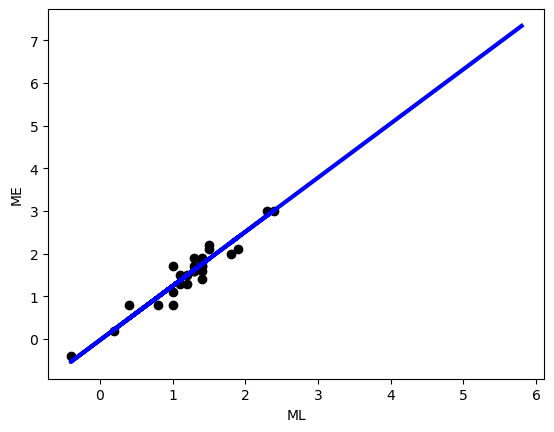


 Got 28 events
log10DR = 0.698 ML + 0.624
alt: ML = 1.43 log10DR - 0.894

 Got 28 events
ML = 1.3 log10DR - 0.678
alt: log10DR = 0.771 ML + 0.523

Average relationship:
log10DR = 0.734 ML + 0.573
alt: ML = 1.36 log10DR - 0.781
R-squared value: 0.906


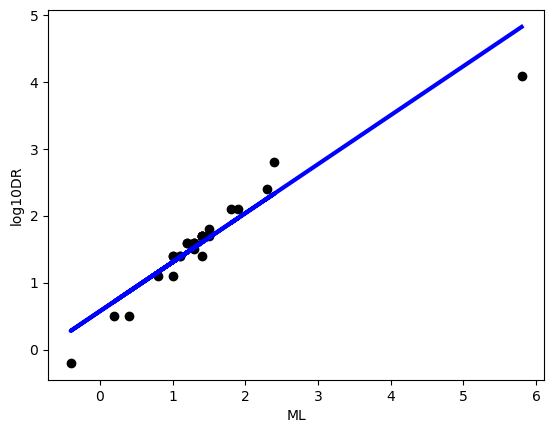

VEI_V vs. ML: Not enough rows
ML vs. VEI_V: Not enough rows

 Got 20 events
log10H = 0.169 ML + 3.83
alt: ML = 5.93 log10H - 22.7

 Got 20 events
ML = 2.2 log10H - 7.53
alt: log10H = 0.454 ML + 3.42

 Got 27 events
log10DR = 0.743 ME + 0.361
alt: ME = 1.35 log10DR - 0.486

 Got 27 events
ME = 1.13 log10DR - 0.166
alt: log10DR = 0.882 ME + 0.146

Average relationship:
log10DR = 0.814 ME + 0.254
alt: ME = 1.23 log10DR - 0.312
R-squared value: 0.843


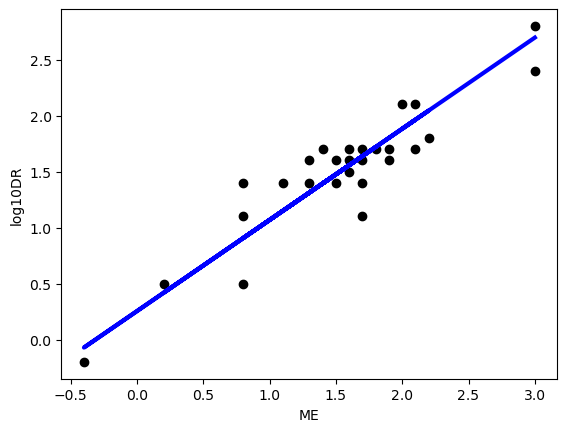

VEI_V vs. ME: Not enough rows
ME vs. VEI_V: Not enough rows

 Got 19 events
log10H = 0.178 ME + 3.77
alt: ME = 5.62 log10H - 21.2

 Got 19 events
ME = 0.692 log10H - 1.3
alt: log10H = 1.45 ME + 1.88
VEI_V vs. log10DR: Not enough rows
log10DR vs. VEI_V: Not enough rows

 Got 20 events
log10H = 0.301 log10DR + 3.58
alt: log10DR = 3.33 log10H - 11.9

 Got 20 events
log10DR = 1.44 log10H - 4.24
alt: log10H = 0.694 log10DR + 2.94
log10H vs. VEI_V: Not enough rows
VEI_V vs. log10H: Not enough rows


In [70]:
print('\n\nWITH HUNGA TONGA\n')

DFT.linearRegressMagnitudesBySubclass2ways(resultsDF, subclass_col='subclass', mag_columns=['ML', 'ME', 'log10DR',  'VEI_V', 'log10H'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)




WITHOUT HUNGA TONGA

# events = 27

 Got 27 events
ME = 1.21 ML + 0.0452
alt: ML = 0.826 ME - 0.0374

 Got 27 events
ML = 0.753 ME + 0.0751
alt: ME = 1.33 ML - 0.0997

Average relationship:
ME = 1.27 ML - 0.0273
alt: ML = 0.788 ME + 0.0215
R-squared value: 0.912


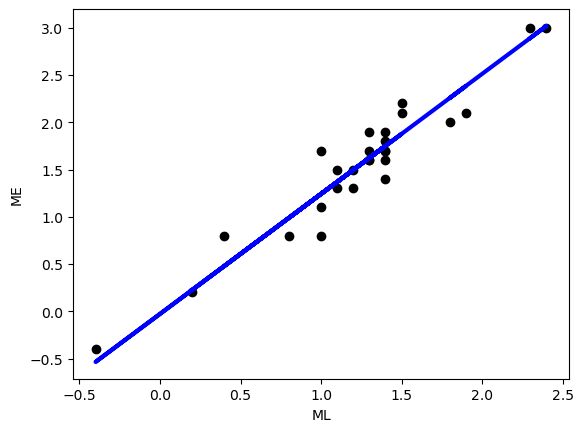


 Got 27 events
log10DR = 1.01 ML + 0.258
alt: ML = 0.99 log10DR - 0.255

 Got 27 events
ML = 0.959 log10DR - 0.208
alt: log10DR = 1.04 ML + 0.217

Average relationship:
log10DR = 1.03 ML + 0.237
alt: ML = 0.974 log10DR - 0.231
R-squared value: 0.969


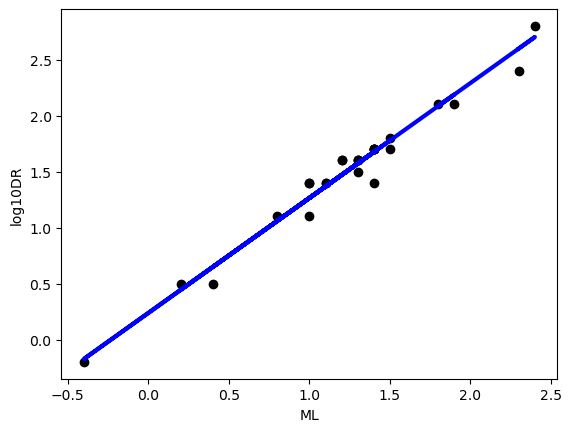

VEI_V vs. ML: Not enough rows
ML vs. VEI_V: Not enough rows

 Got 19 events
log10H = 0.193 ML + 3.8
alt: ML = 5.18 log10H - 19.7

 Got 19 events
ML = 0.298 log10H + 0.0132
alt: log10H = 3.36 ML - 0.0443

 Got 27 events
log10DR = 0.743 ME + 0.361
alt: ME = 1.35 log10DR - 0.486

 Got 27 events
ME = 1.13 log10DR - 0.166
alt: log10DR = 0.882 ME + 0.146

Average relationship:
log10DR = 0.814 ME + 0.254
alt: ME = 1.23 log10DR - 0.312
R-squared value: 0.843


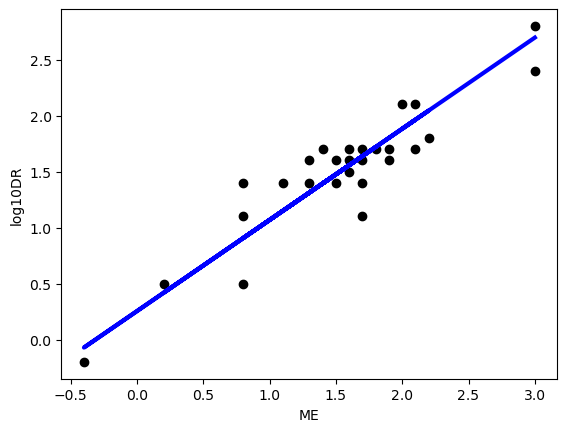

VEI_V vs. ME: Not enough rows
ME vs. VEI_V: Not enough rows

 Got 19 events
log10H = 0.178 ME + 3.77
alt: ME = 5.62 log10H - 21.2

 Got 19 events
ME = 0.692 log10H - 1.3
alt: log10H = 1.45 ME + 1.88
VEI_V vs. log10DR: Not enough rows
log10DR vs. VEI_V: Not enough rows

 Got 19 events
log10H = 0.325 log10DR + 3.55
alt: log10DR = 3.08 log10H - 10.9

 Got 19 events
log10DR = 0.464 log10H - 0.364
alt: log10H = 2.15 log10DR + 0.783
log10H vs. VEI_V: Not enough rows
VEI_V vs. log10H: Not enough rows


In [71]:
print('\n\nWITHOUT HUNGA TONGA\n')

DFT.linearRegressMagnitudesBySubclass2ways(resultsDF2, subclass_col='subclass', mag_columns=['ML', 'ME', 'log10DR',  'VEI_V', 'log10H'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)

In [ ]:
DFT.fix_slope(resultsDF2, 'ML', 'ME', mfixed=4/3)
DFT.fix_slope(resultsDF2, 'ME', 'ML', mfixed=3/4)
DFT.fix_slope(resultsDF2, 'log10DR', 'ME', mfixed=4/3)
DFT.fix_slope(resultsDF2, 'ME', 'log10DR', mfixed=3/4)
DFT.fix_slope(resultsDF2, 'ML', 'log10DR', mfixed=1.0)
DFT.fix_slope(resultsDF2, 'log10DR', 'ML', mfixed=1.0)

In [ ]:
# fix slope at 1.33 for ME vs ML
DFT.fix_slope(resultsDF2, 'ML', 'log10DR', mfixed=1.0)

In [ ]:
np.log10(10000)*0.11

Which values are reasonable to accept?
- For event 0, there were only short-period seismometers available, so the VLP-band results should be ignored. Since we are at local distances, we expect body waves to dominate, so we choose $D_R$ over $D_{RS}$ and accept 218 ${cm}^2$.
- For event 1, while broadband seismometers were available, the VLP-band results are lower. Again, we prefer $D_R$ over $D_{RS}$, since we are at local distances, so we accept 342 ${cm}^2$.
- For event 2, while the VLP bands show higher results, Whakaari is a small island, so the VLP energy likely comes from ocean noise. Again, we are at the local scale, so we accept 18.8 ${cm}^2$.
- For event 3, Redoubt is coastal, and we are at local distances, so we choose $D_R$, and accept 64 ${cm}^2$.
- For event 4, station MSVF is about 760 km from Hunga Tonga, so surface waves dominate, and most of the signal is between 0.01 and 0.6 Hz. Is the $D_{RS}^{VLP}$ value of 39,000 ${cm}^2$ reasonable? 

Clearly, we must be very careful applying the same measurements at local, regional, and global scales!

#### CAVEAT: We ignored inelastic attenuation in this analysis. Including it would make Reduced Displacement estimates even higher!

Finally, there is a sort of "magnitude scale" for volcanic eruptions called the Volcanic Explosivity Index (VEI), which similar to earthquake magnitude scales, runs from about 1 to 8. However, VEI is not an instrumental measurement, and instead is estimated from the volume of deposits found, and the height an ash column reaches, and other things. Hunga Tonga was estimated by different researchers to be either a VEI=5 or VEI=6 eruption, so if we fix that at VEI=5.5 and throw caution to the wind, here are instrumental VEI estimates for the other events above too:

# McNutt & Nishimura [2008] dataset #

In [69]:
import os
import numpy as np
import sys
sys.path.append('lib')
import dataframe_tools as DFT
import pandas as pd
import importlib
importlib.reload(DFT)
mcnuttDF = pd.read_csv(os.path.join(os.getenv('HOME'), 'Dropbox/BRIEFCASE/SSA2024/mcnutt2008.csv'))
mcnuttDF['Duration'] = mcnuttDF['Duration'] * 3600 # hours to seconds
if 'Height' in mcnuttDF.columns:
    mcnuttDF['H'] = mcnuttDF['Height'] * 1000 # km to m
    mcnuttDF['V'] = mcnuttDF['V'] * 1e6 # 10^6m3 to m3
    mcnuttDF.drop(columns=['Height'],inplace=True)

estimate_VEI(mcnuttDF, Hcol='H', Vcol='V')
#display(mcnuttDF)
#mcnuttDF = mcnuttDF.replace({None: np.nan, NaN: np.nan})
#mcnuttDF.iloc[14]['V']
#print(mcnuttDF.isna())

mcnuttDF['log10DR'] = np.round(np.log10(mcnuttDF['DR']),1)
mcnuttDF['log10V'] = np.round(np.log10(mcnuttDF['V']),1)
mcnuttDF['log10H'] = np.round(np.log10(mcnuttDF['H']),1)
mcnuttDF_without_smallest= mcnuttDF[mcnuttDF['log10V']>4.0]
mcnuttDF_small = mcnuttDF[mcnuttDF['log10DR']<3.05]
display(mcnuttDF[['Volcano', 'Date', 'log10DR', 'VEI', 'VEI_V', 'log10H']])

,Volcano,Date,log10DR,VEI,VEI_V,log10H
0,ElChichon,1982/04/04,2.4,5,4.3,4.2
1,IzuOshima,1986/11/15,3.1,2,2.6,3.7
2,IzuOshima,1986/11/21,3.4,3,3.4,4.2
3,Kilauea,1983/01/05,1.3,2,2.7,3.3
4,Kilauea,1983/10/02,1.2,2,3.1,3.3
5,Kilauea,1983/11/05,1.2,2,3.1,3.3
6,Miyake,1983/10/03,1.8,3,2.9,4.0
7,Nyamuragira,1981/12/25,2.1,3,3.4,3.8
8,Nyamuragira,1986/07/16,NaN,2,3.1,3.7
9,Nyiragongo,1994/11/01,0.6,1,-1.0,3.0


# events = 21

 Got 20 events
log10H = 0.255 log10DR + 3.48
alt: log10DR = 3.93 log10H - 13.7

 Got 20 events
log10DR = 0.961 log10H - 1.98
alt: log10H = 1.04 log10DR + 2.06

 Got 20 events
VEI = 0.833 log10DR + 1.59
alt: log10DR = 1.2 VEI - 1.91

 Got 20 events
log10DR = 0.333 VEI + 0.779
alt: VEI = 3.01 log10DR - 2.34

 Got 20 events
VEI_V = 0.625 log10DR + 2.32
alt: log10DR = 1.6 VEI_V - 3.72

 Got 20 events
log10DR = 0.436 VEI_V + 0.304
alt: VEI_V = 2.29 log10DR - 0.697

 Got 21 events
VEI = 2.54 log10H - 6.94
alt: log10H = 0.394 VEI + 2.73

 Got 21 events
log10H = 0.262 VEI + 3.13
alt: VEI = 3.81 log10H - 11.9

Average relationship:
VEI = 3.18 log10H - 9.44
alt: log10H = 0.315 VEI + 2.97
R-squared value: 0.667


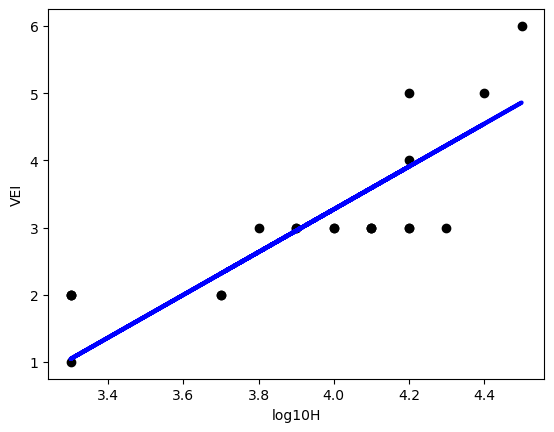


 Got 21 events
VEI_V = 1.68 log10H - 3.15
alt: log10H = 0.596 VEI_V + 1.88

 Got 21 events
log10H = 0.313 VEI_V + 2.85
alt: VEI_V = 3.19 log10H - 9.1

Average relationship:
VEI_V = 2.44 log10H - 6.13
alt: log10H = 0.41 VEI_V + 2.51
R-squared value: 0.526


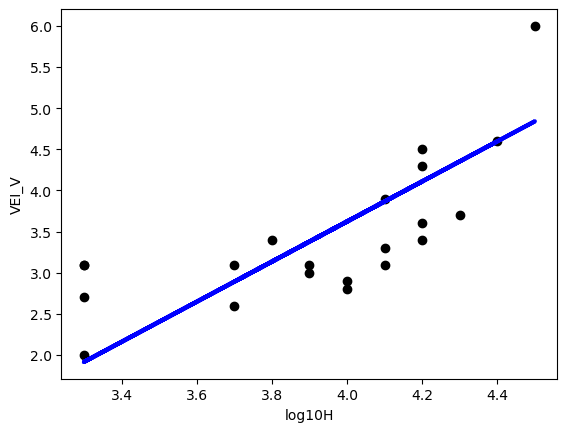


 Got 21 events
VEI_V = 0.678 VEI + 1.37
alt: VEI = 1.48 VEI_V - 2.03

 Got 21 events
VEI = 1.23 VEI_V - 1.17
alt: VEI_V = 0.815 VEI + 0.953

Average relationship:
VEI_V = 0.746 VEI + 1.16
alt: VEI = 1.34 VEI_V - 1.56
R-squared value: 0.831


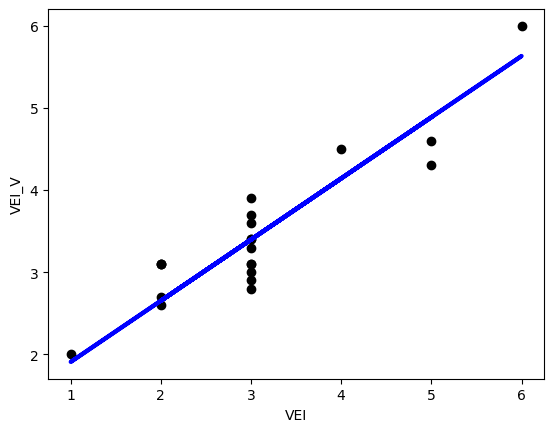

In [61]:
DFT.linearRegressMagnitudesBySubclass2ways(mcnuttDF_without_smallest, mag_columns=['log10DR', 'log10H', 'VEI', 'VEI_V'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)



# events = 21

 Got 21 events
log10H = 0.547 log10DR + 2.95
alt: log10DR = 1.83 log10H - 5.38

 Got 21 events
log10DR = 0.806 log10H - 1.5
alt: log10H = 1.24 log10DR + 1.86

 Got 21 events
VEI = 1.9 log10DR - 0.116
alt: log10DR = 0.527 VEI + 0.0611

 Got 21 events
log10DR = 0.372 VEI + 0.504
alt: VEI = 2.69 log10DR - 1.36

Average relationship:
VEI = 2.29 log10DR - 0.735
alt: log10DR = 0.436 VEI + 0.321
R-squared value: 0.706


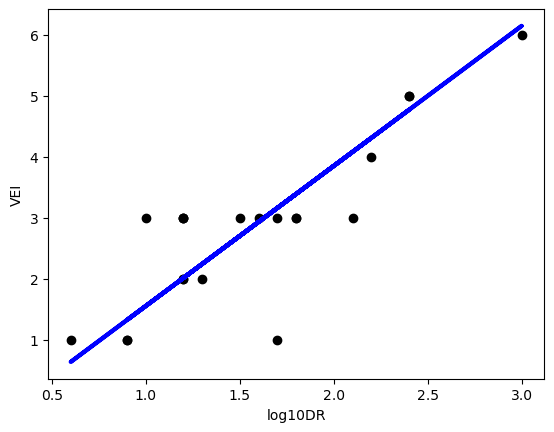


 Got 19 events
VEI_V = 1.83 log10DR + 0.346
alt: log10DR = 0.546 VEI_V - 0.189

 Got 19 events
log10DR = 0.369 VEI_V + 0.389
alt: VEI_V = 2.71 log10DR - 1.05

Average relationship:
VEI_V = 2.27 log10DR - 0.354
alt: log10DR = 0.441 VEI_V + 0.156
R-squared value: 0.676


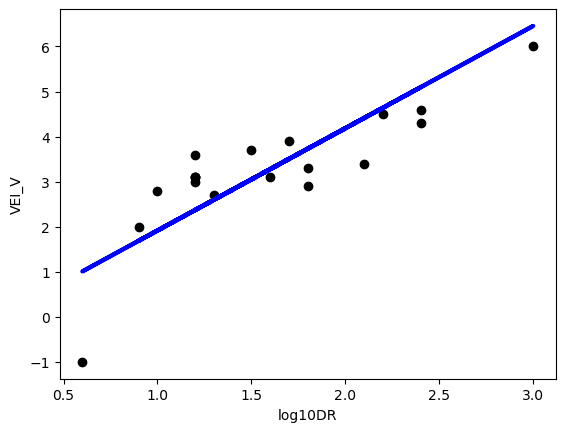


 Got 21 events
VEI = 2.43 log10H - 6.37
alt: log10H = 0.412 VEI + 2.63

 Got 21 events
log10H = 0.323 VEI + 2.88
alt: VEI = 3.1 log10H - 8.92

Average relationship:
VEI = 2.76 log10H - 7.64
alt: log10H = 0.362 VEI + 2.77
R-squared value: 0.784


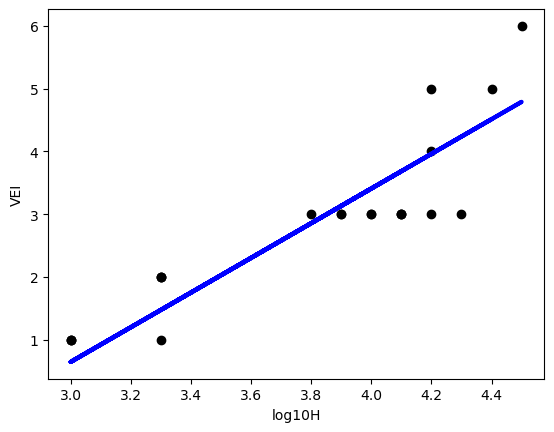


 Got 19 events
VEI_V = 2.44 log10H - 6.24
alt: log10H = 0.409 VEI_V + 2.55

 Got 19 events
log10H = 0.253 VEI_V + 3.06
alt: VEI_V = 3.95 log10H - 12.1

Average relationship:
VEI_V = 3.2 log10H - 9.17
alt: log10H = 0.313 VEI_V + 2.87
R-squared value: 0.618


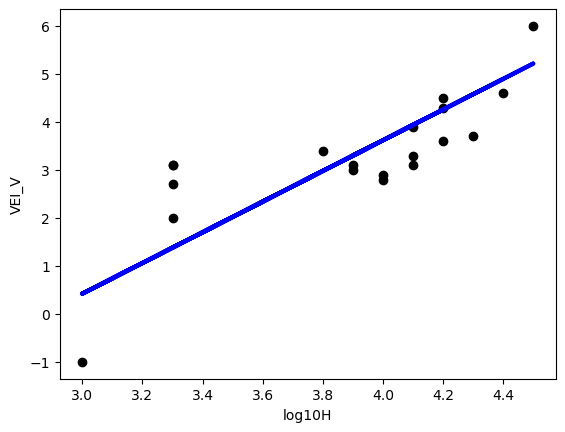


 Got 19 events
VEI_V = 0.903 VEI + 0.513
alt: VEI = 1.11 VEI_V - 0.568

 Got 19 events
VEI = 0.787 VEI_V + 0.482
alt: VEI_V = 1.27 VEI - 0.612

Average relationship:
VEI_V = 1.09 VEI - 0.0497
alt: VEI = 0.92 VEI_V + 0.0458
R-squared value: 0.71


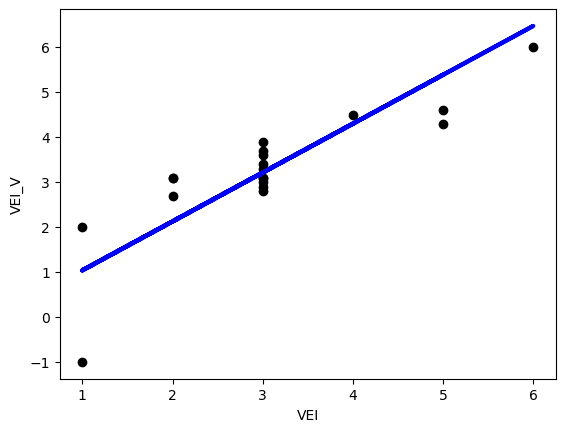

In [62]:
DFT.linearRegressMagnitudesBySubclass2ways(mcnuttDF_small, mag_columns=['log10DR', 'log10H', 'VEI', 'VEI_V'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)




 Got 21 events
log10DR = 0.372 VEI + 0.504
alt: VEI = 2.69 log10DR - 1.36

 Got 21 events
VEI = 1.9 log10DR - 0.116
alt: log10DR = 0.527 VEI + 0.0611

Average relationship:
log10DR = 0.449 VEI + 0.283
alt: VEI = 2.23 log10DR - 0.629
R-squared value: 0.706
Mean squared error: 0.11


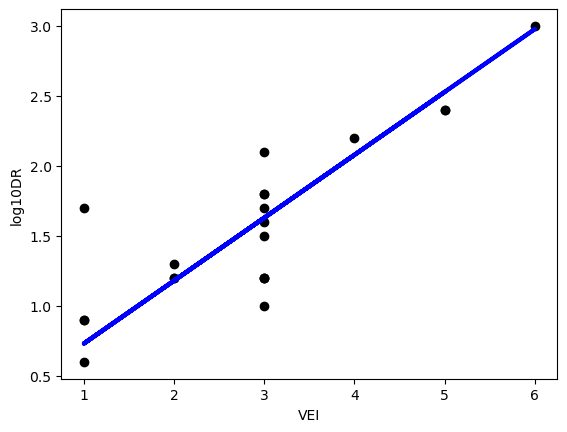

In [43]:
DFT.linregress_2ways(mcnuttDF_small, 'VEI', 'log10DR')


 Got 23 events
log10DR = 0.347 VEI + 0.732
alt: VEI = 2.89 log10DR - 2.11
R-squared value: 0.362
Mean squared error: 0.34
log10DR_fixed = 0.46 VEI + 0.412
alt: VEI = 2.17 log10DR_fixed - 0.896


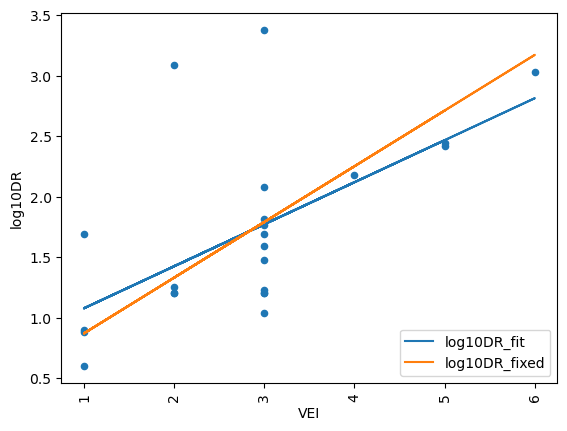

In [15]:
DFT.fix_slope(mcnuttDF, 'VEI', 'log10DR', mfixed=0.46)


 Got 21 events
log10DR = 0.379 VEI + 0.483
alt: VEI = 2.64 log10DR - 1.27
R-squared value: 0.725
Mean squared error: 0.10
log10DR_fixed = 0.46 VEI + 0.253
alt: VEI = 2.17 log10DR_fixed - 0.55


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

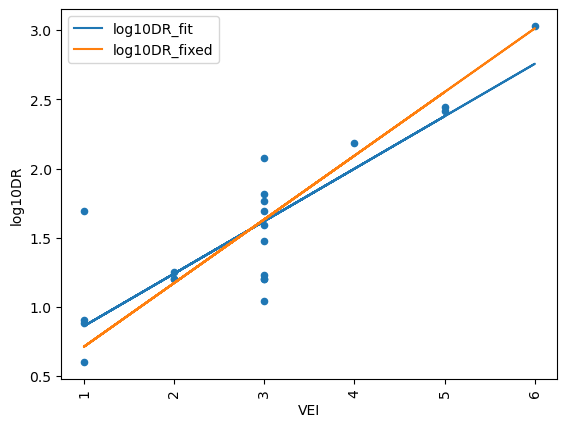

In [20]:
mcnuttDF_small = mcnuttDF[mcnuttDF['log10DR']<3.05]
DFT.fix_slope(mcnuttDF_small, 'VEI', 'log10DR', mfixed=0.46)


 Got 21 events
VEI = 1.91 log10DR - 0.136
alt: log10DR = 0.523 VEI + 0.0713
R-squared value: 0.725
Mean squared error: 0.48
VEI_fixed = 2.17 log10DR - 0.549
alt: log10DR = 0.46 VEI_fixed + 0.253


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

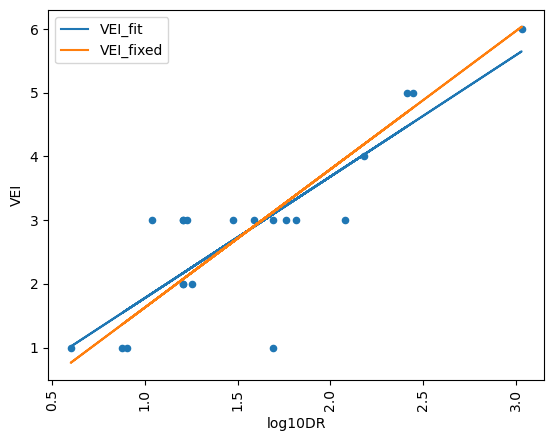

In [17]:
DFT.fix_slope(mcnuttDF_small, 'log10DR', 'VEI',  mfixed=1.0/0.46)


 Got 21 events
log10DR = 0.833 log10H - 1.6
alt: log10H = 1.2 log10DR + 1.92
R-squared value: 0.451
Mean squared error: 0.19
log10DR_fixed = 1.8 log10H - 5.27
alt: log10H = 0.556 log10DR_fixed + 2.93


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

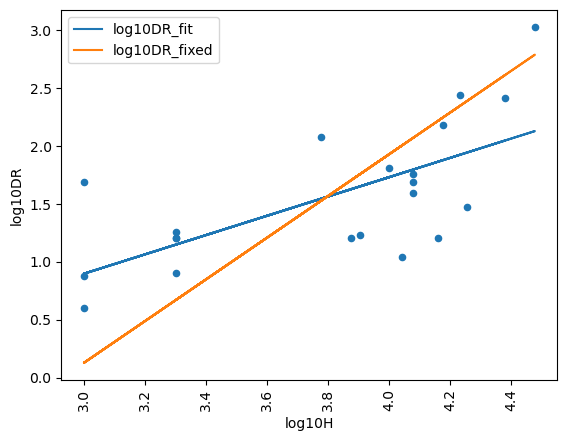


 Got 21 events
log10H = 0.542 log10DR + 2.95
alt: log10DR = 1.85 log10H - 5.44
R-squared value: 0.451
Mean squared error: 0.12
log10H_fixed = 0.556 log10DR + 2.93
alt: log10DR = 1.8 log10H_fixed - 5.27


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

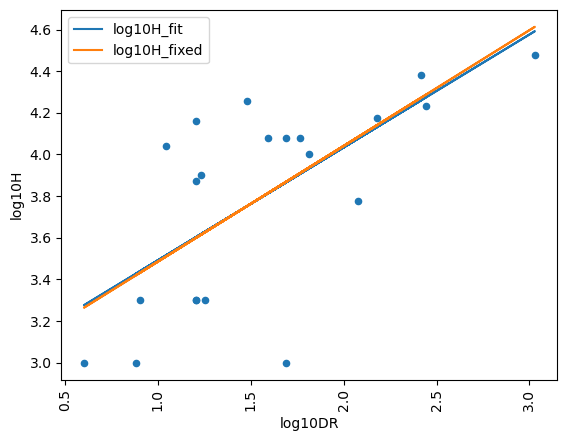

In [23]:
DFT.fix_slope(mcnuttDF_small, 'log10H', 'log10DR', mfixed=1.8)
DFT.fix_slope(mcnuttDF_small, 'log10DR', 'log10H', mfixed=1.0/1.8)
#DFT.fix_slope(mcnuttDF_small, 'log10DR', 'VEI_V', mfixed=1.0)

In [ ]:
DFT.linregress(mcnuttDF, 'log10V', 'VEI', plot=True, print_stats=True)
mcnuttDF_small = mcnuttDF[mcnuttDF['log10V']>3.05]
DFT.linregress(mcnuttDF_small, 'log10V', 'VEI', plot=True, print_stats=True)

In [ ]:
DFT.linregress(mcnuttDF, 'log10H', 'VEI', plot=True, print_stats=True)
mcnuttDF_small = mcnuttDF[mcnuttDF['log10H']>3.05]
DFT.linregress(mcnuttDF_small, 'log10H', 'VEI', plot=True, print_stats=True)
mcnuttDF_small = mcnuttDF[mcnuttDF['log10H']<4.2]
DFT.linregress(mcnuttDF_small, 'log10H', 'VEI', plot=True, print_stats=True)

In [ ]:
DFT.linregress(mcnuttDF, 'log10DR', 'log10H', plot=True, print_stats=True)
mcnuttDF_small = mcnuttDF[mcnuttDF['log10DR']<3.05]
#mcnuttDF_small = mcnuttDF_small[mcnuttDF_small['log10Height']>3.2]
DFT.linregress(mcnuttDF_small, 'log10DR', 'log10H', plot=True, print_stats=True)

# Try combining the McNutt & Nishimura with my quantitative measurements

In [72]:
print(resultsDF.columns)
print(mcnuttDF.columns)

Index(['Event', 'start', 'end', 'duration', 'ML', 'sum(ER)', 'ME', 'DR', 'DRS',
       'Hc_km', 'V_km3', 'VEI', 'VEI_H', 'VEI_V', 'V', 'H', 'log10DR',
       'log10V', 'log10H'],
      dtype='object')
Index(['Volcano', 'Date', 'V', 'VEI', 'Duration', 'DR', 'Freq', 'H', 'VEI_V',
       'VEI_H', 'log10DR', 'log10V', 'log10H'],
      dtype='object')


In [74]:
resultsA = resultsDF[[ 'VEI', 'log10DR',  'log10H',  'VEI_V']]
print(resultsA)
mcnuttA = mcnuttDF[['VEI', 'log10DR', 'log10H',  'VEI_V']]
print(mcnuttA)

     VEI  log10DR  log10H VEI_V
0   None      2.4     NaN   3.8
4   None      2.8     NaN   nan
5   None      2.1     NaN   nan
6   None      2.1     NaN   nan
7   None      1.1     NaN   nan
8   None      0.5     NaN   nan
9   None      1.4     3.3   nan
10  None     -0.2     NaN   nan
11  None      1.4     3.7   nan
12  None      1.7     4.1   nan
13  None      1.6     4.1   nan
14  None      1.8     4.1   nan
15  None      1.7     4.2   nan
16  None      1.7     4.3   nan
17  None      0.5     3.8   nan
18  None      1.7     4.3   nan
19  None      1.1     4.0   nan
20  None      1.5     4.2   nan
21  None      1.6     4.2   nan
22  None      1.7     4.1   nan
23  None      1.6     4.2   nan
24  None      1.6     4.1   nan
25  None      1.4     4.1   nan
26  None      1.7     3.7   nan
27  None      1.6     4.1   nan
28  None      1.4     4.1   nan
29  None      1.4     NaN   nan
30  None      4.1     4.8   5.9
    VEI  log10DR  log10H VEI_V
0     5      2.4     4.2   4.3
1     2   

In [76]:
combinedA = pd.concat([resultsA,mcnuttA])
display(combinedA)

,VEI,log10DR,log10H,VEI_V
0,None,2.4,NaN,3.8
4,None,2.8,NaN,nan
5,None,2.1,NaN,nan
6,None,2.1,NaN,nan
7,None,1.1,NaN,nan
8,None,0.5,NaN,nan
9,None,1.4,3.3,nan
10,None,-0.2,NaN,nan
11,None,1.4,3.7,nan
12,None,1.7,4.1,nan


# events = 23

 Got 21 events
log10H = 0.294 log10DR + 3.42
alt: log10DR = 3.4 log10H - 11.6

 Got 21 events
log10DR = 1.31 log10H - 3.3
alt: log10H = 0.763 log10DR + 2.52

 Got 20 events
VEI = 0.833 log10DR + 1.59
alt: log10DR = 1.2 VEI - 1.91

 Got 20 events
log10DR = 0.333 VEI + 0.779
alt: VEI = 3.01 log10DR - 2.34

 Got 22 events
VEI_V = 0.766 log10DR + 2.1
alt: log10DR = 1.31 VEI_V - 2.74

 Got 22 events
log10DR = 0.579 VEI_V - 0.133
alt: VEI_V = 1.73 log10DR + 0.23

 Got 21 events
VEI = 2.54 log10H - 6.94
alt: log10H = 0.394 VEI + 2.73

 Got 21 events
log10H = 0.262 VEI + 3.13
alt: VEI = 3.81 log10H - 11.9

Average relationship:
VEI = 3.18 log10H - 9.44
alt: log10H = 0.315 VEI + 2.97
R-squared value: 0.667


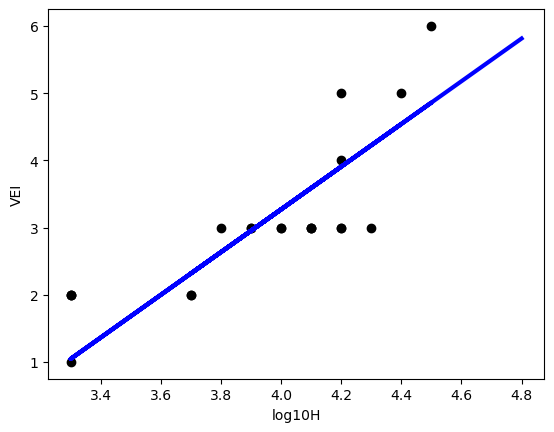


 Got 22 events
VEI_V = 1.91 log10H - 4.05
alt: log10H = 0.522 VEI_V + 2.11

 Got 22 events
log10H = 0.325 VEI_V + 2.82
alt: VEI_V = 3.08 log10H - 8.67

Average relationship:
VEI_V = 2.49 log10H - 6.36
alt: log10H = 0.401 VEI_V + 2.55
R-squared value: 0.622


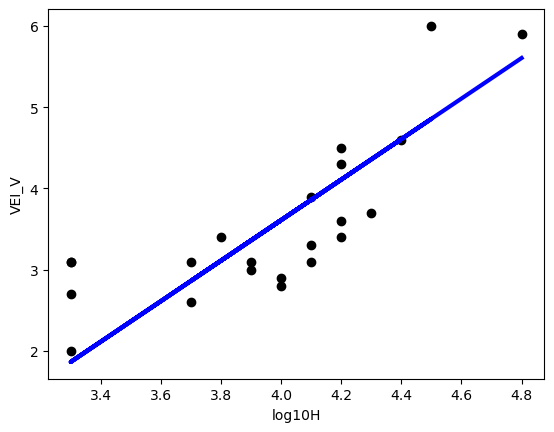


 Got 21 events
VEI_V = 0.678 VEI + 1.37
alt: VEI = 1.48 VEI_V - 2.03

 Got 21 events
VEI = 1.23 VEI_V - 1.17
alt: VEI_V = 0.815 VEI + 0.953

Average relationship:
VEI_V = 0.746 VEI + 1.16
alt: VEI = 1.34 VEI_V - 1.56
R-squared value: 0.831


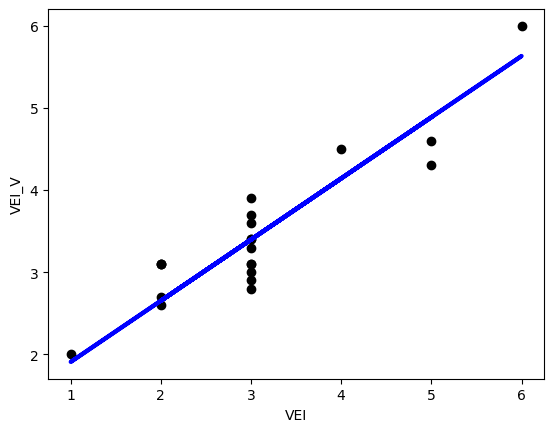

In [80]:
combinedA_without_smallest= combinedA[combinedA['VEI_V']>0.0]
combinedA_small = combinedA[combinedA['log10DR']<3.05]
DFT.linearRegressMagnitudesBySubclass2ways(combinedA_without_smallest, mag_columns=['log10DR', 'log10H', 'VEI', 'VEI_V'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)


# events = 48

 Got 40 events
log10H = 0.491 log10DR + 3.16
alt: log10DR = 2.04 log10H - 6.44

 Got 40 events
log10DR = 0.661 log10H - 1.05
alt: log10H = 1.51 log10DR + 1.59

 Got 21 events
VEI = 1.9 log10DR - 0.116
alt: log10DR = 0.527 VEI + 0.0611

 Got 21 events
log10DR = 0.372 VEI + 0.504
alt: VEI = 2.69 log10DR - 1.36

Average relationship:
VEI = 2.29 log10DR - 0.735
alt: log10DR = 0.436 VEI + 0.321
R-squared value: 0.706


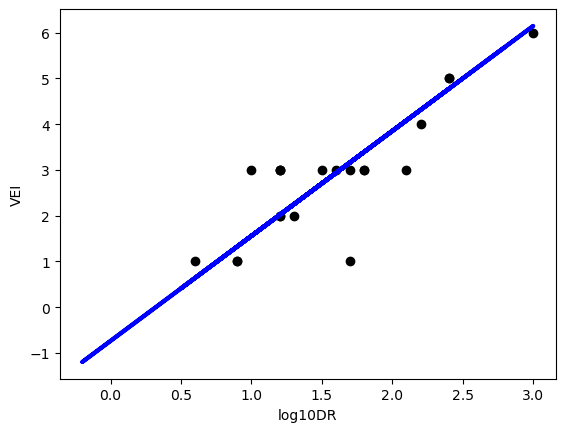


 Got 20 events
VEI_V = 1.73 log10DR + 0.461
alt: log10DR = 0.577 VEI_V - 0.266

 Got 20 events
log10DR = 0.378 VEI_V + 0.389
alt: VEI_V = 2.64 log10DR - 1.03

Average relationship:
VEI_V = 2.19 log10DR - 0.284
alt: log10DR = 0.457 VEI_V + 0.13
R-squared value: 0.655


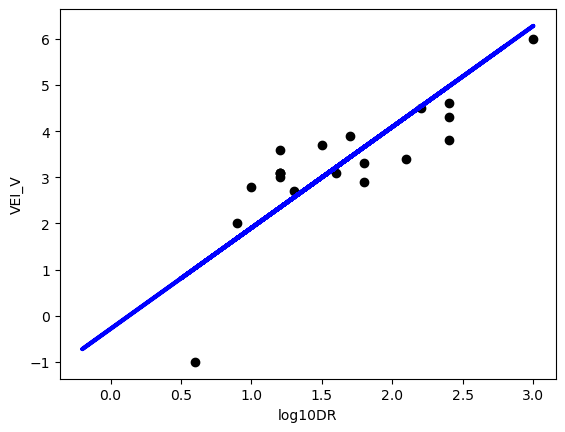


 Got 21 events
VEI = 2.43 log10H - 6.37
alt: log10H = 0.412 VEI + 2.63

 Got 21 events
log10H = 0.323 VEI + 2.88
alt: VEI = 3.1 log10H - 8.92

Average relationship:
VEI = 2.76 log10H - 7.64
alt: log10H = 0.362 VEI + 2.77
R-squared value: 0.784


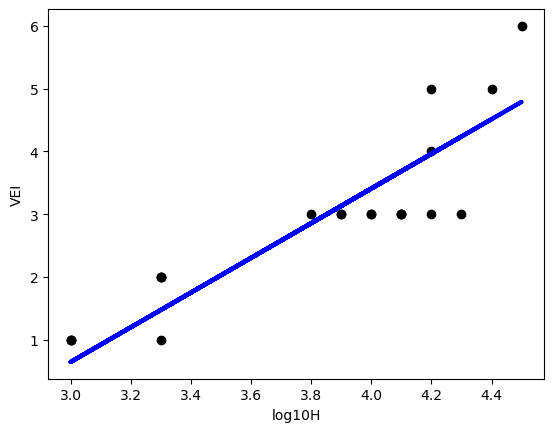


 Got 19 events
VEI_V = 2.44 log10H - 6.24
alt: log10H = 0.409 VEI_V + 2.55

 Got 19 events
log10H = 0.253 VEI_V + 3.06
alt: VEI_V = 3.95 log10H - 12.1

Average relationship:
VEI_V = 3.2 log10H - 9.17
alt: log10H = 0.313 VEI_V + 2.87
R-squared value: 0.618


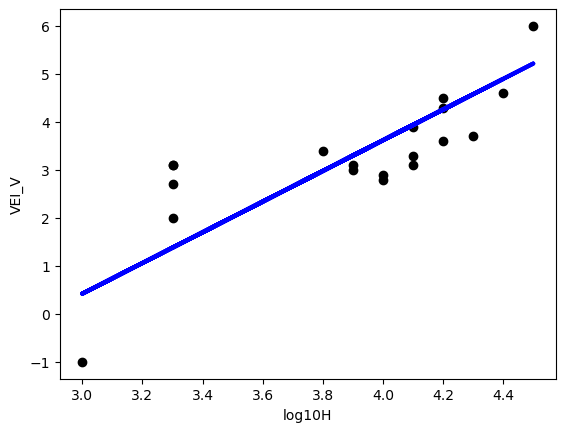


 Got 19 events
VEI_V = 0.903 VEI + 0.513
alt: VEI = 1.11 VEI_V - 0.568

 Got 19 events
VEI = 0.787 VEI_V + 0.482
alt: VEI_V = 1.27 VEI - 0.612

Average relationship:
VEI_V = 1.09 VEI - 0.0497
alt: VEI = 0.92 VEI_V + 0.0458
R-squared value: 0.71


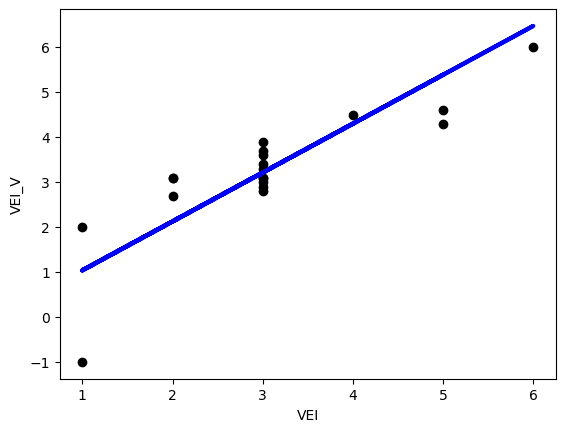

In [81]:
DFT.linearRegressMagnitudesBySubclass2ways(combinedA_small, mag_columns=['log10DR', 'log10H', 'VEI', 'VEI_V'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)

In [ ]:
c = combinedA['VEI_V'] - combinedA['log10DR']
print(c)
print(c.mean())
print(c.median())

# Try analyzing the Redoubt 2009 data I processed with results from McNutt et al 2013 and Buurman et al 2013

In [86]:
redoubtDF = pd.read_csv(os.path.join(os.getenv('HOME'), 'Developer/skience2024_GTplus/02 Volcano Monitoring/redoubt2009.csv'))
redoubtDF['ME_s'] = np.round(2/3*np.log10(redoubtDF['S_Eng']) - 3.2,1)
redoubtDF['ME_a'] = np.round(2/3*np.log10(redoubtDF['P_Eng']) - 3.2,1)
redoubtDF['log10A_s'] = np.log10(redoubtDF['S_Amp'])
redoubtDF['log10A_a'] = np.log10(redoubtDF['P_Amp'])
totalV = 1e8 # m3
totalE = redoubtDF['sum(ER)'].sum()
redoubtDF['V_ER'] = redoubtDF['sum(ER)']/totalE * totalV
redoubtDF['log10VER'] = np.log10(redoubtDF['V_ER'])
redoubtDF['VEI_Vs'] = np.round(redoubtDF['log10VER'] - 4,1)
totalEA = redoubtDF['P_Eng'].sum()
redoubtDF['V_ERA'] = redoubtDF['P_Eng']/totalEA * totalV
redoubtDF['log10VERA'] = np.log10(redoubtDF['V_ERA'])
redoubtDF['VEI_Va'] = np.round(redoubtDF['log10VERA'] + np.log10(totalE/totalEA),1)
#display(mergedDF[['Event', 'start', 'ML', 'ME', 'log10DR', 'VEI_V', 'log10H', 'ME_s', 'ME_a', 'VEI_Vs', 'VEI_Va']])
mergedDF = pd.merge(redoubtDF, resultsDF, on="Event", suffixes=['_x', None])
mergedDF.loc[:,~mergedDF.columns.str.endswith('_x')]
#display(mergedDF)
display(mergedDF[['Event', 'start', 'ML', 'ME', 'log10DR', 'log10A_s', 'log10A_a',  'ME_s', 'ME_a', 'log10H']])
#display(redoubtDF)
#print(redoubtDF.columns)

,Event,start,ML,ME,log10DR,log10A_s,log10A_a,ME_s,ME_a,log10H
0,2009 Redoubt: subevent 0,2009-02-15 21:05,-0.4,-0.4,-0.2,NaN,NaN,NaN,NaN,NaN
1,2009 Redoubt: subevent 1,2009-03-23 06:34,1.0,0.8,1.4,0.698970,1.397940,1.7,3.4,3.7
2,2009 Redoubt: subevent 2,2009-03-23 07:02,1.4,1.7,1.7,1.123852,2.178977,2.2,3.5,4.1
3,2009 Redoubt: subevent 3,2009-03-23 08:14,1.3,1.9,1.6,0.934498,1.579784,2.2,3.7,4.1
4,2009 Redoubt: subevent 4,2009-03-23 09:38,1.5,2.2,1.8,1.869232,1.845098,2.4,3.4,4.1
5,2009 Redoubt: subevent 5,2009-03-23 12:30,1.5,2.1,1.7,1.633468,2.397940,2.6,3.7,4.2
6,2009 Redoubt: subevent 6,2009-03-24 03:40,1.4,1.9,1.7,1.204120,1.880814,2.3,3.4,4.3
7,2009 Redoubt: subevent 7,2009-03-26 16:34,0.2,0.2,0.5,0.477121,0.845098,0.4,1.9,3.8
8,2009 Redoubt: subevent 8,2009-03-26 17:24,1.4,1.8,1.7,1.079181,2.000000,2.2,3.3,4.3
9,2009 Redoubt: subevent 9,2009-03-27 07:47,0.8,0.8,1.1,1.079181,1.491362,1.7,2.9,4.0


# events = 20

 Got 20 events
ME = 1.29 ML - 0.0685
alt: ML = 0.773 ME + 0.053

 Got 20 events
ML = 0.699 ME + 0.156
alt: ME = 1.43 ML - 0.223

Average relationship:
ME = 1.36 ML - 0.146
alt: ML = 0.735 ME + 0.107
R-squared value: 0.904


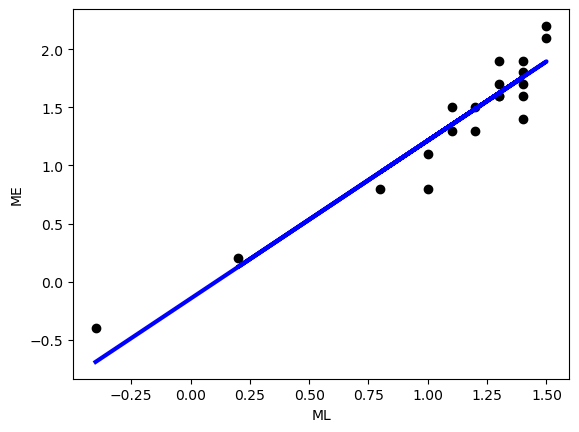


 Got 20 events
log10DR = 1.02 ML + 0.281
alt: ML = 0.979 log10DR - 0.275

 Got 20 events
ML = 0.964 log10DR - 0.253
alt: log10DR = 1.04 ML + 0.263

Average relationship:
log10DR = 1.03 ML + 0.272
alt: ML = 0.972 log10DR - 0.264
R-squared value: 0.984


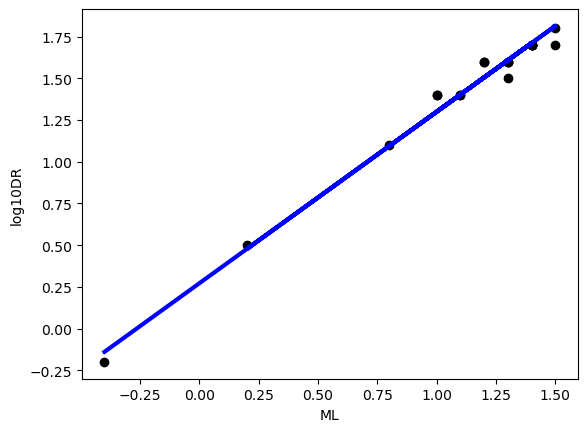


 Got 19 events
log10A_s = 0.767 ML + 0.167
alt: ML = 1.3 log10A_s - 0.218

 Got 19 events
ML = 0.537 log10A_s + 0.616
alt: log10A_s = 1.86 ML - 1.15

 Got 19 events
log10A_a = 0.899 ML + 0.699
alt: ML = 1.11 log10A_a - 0.777

 Got 19 events
ML = 0.68 log10A_a - 0.00981
alt: log10A_a = 1.47 ML + 0.0144

Average relationship:
log10A_a = 1.18 ML + 0.357
alt: ML = 0.844 log10A_a - 0.301
R-squared value: 0.612


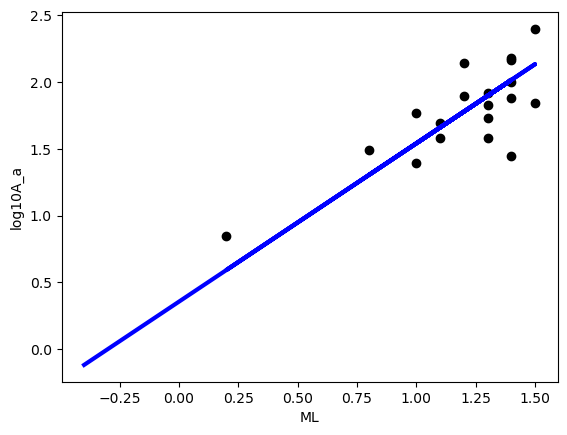


 Got 19 events
ME_s = 1.41 ML + 0.139
alt: ML = 0.709 ME_s - 0.0983

 Got 19 events
ML = 0.508 ME_s + 0.269
alt: ME_s = 1.97 ML - 0.528

Average relationship:
ME_s = 1.69 ML - 0.195
alt: ML = 0.592 ME_s + 0.116
R-squared value: 0.717


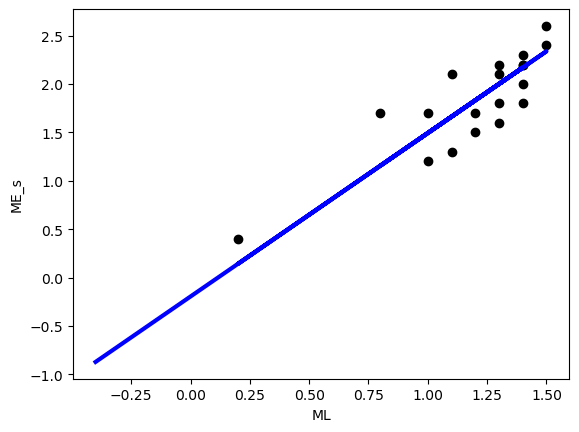


 Got 19 events
ME_a = 1.07 ML + 1.84
alt: ML = 0.933 ME_a - 1.71

 Got 19 events
ML = 0.586 ME_a - 0.629
alt: ME_a = 1.71 ML + 1.07

Average relationship:
ME_a = 1.39 ML + 1.46
alt: ML = 0.72 ME_a - 1.05
R-squared value: 0.628


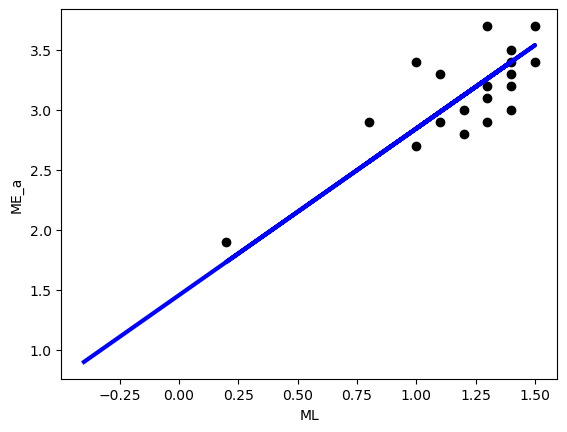


 Got 18 events
log10H = 0.283 ML + 3.74
alt: ML = 3.54 log10H - 13.2

 Got 18 events
ML = 0.889 log10H - 2.42
alt: log10H = 1.12 ML + 2.72

 Got 20 events
log10DR = 0.699 ME + 0.461
alt: ME = 1.43 log10DR - 0.659

 Got 20 events
ME = 1.22 log10DR - 0.36
alt: log10DR = 0.819 ME + 0.295

Average relationship:
log10DR = 0.759 ME + 0.378
alt: ME = 1.32 log10DR - 0.498
R-squared value: 0.853


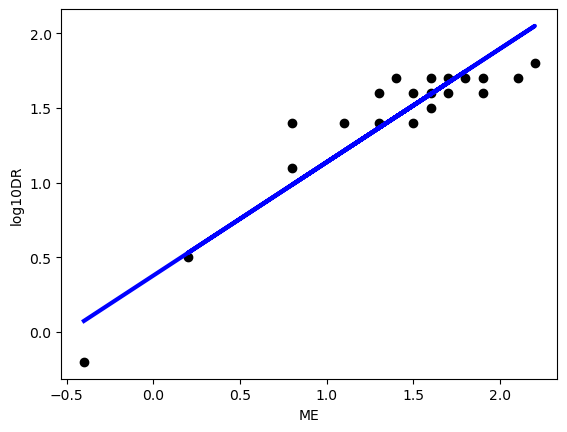


 Got 19 events
log10A_s = 0.498 ME + 0.353
alt: ME = 2.01 log10A_s - 0.708

 Got 19 events
ME = 0.889 log10A_s + 0.507
alt: log10A_s = 1.12 ME - 0.57

 Got 19 events
log10A_a = 0.511 ME + 1.03
alt: ME = 1.96 log10A_a - 2.01

 Got 19 events
ME = 0.984 log10A_a - 0.275
alt: log10A_a = 1.02 ME + 0.28

Average relationship:
log10A_a = 0.764 ME + 0.655
alt: ME = 1.31 log10A_a - 0.857
R-squared value: 0.502


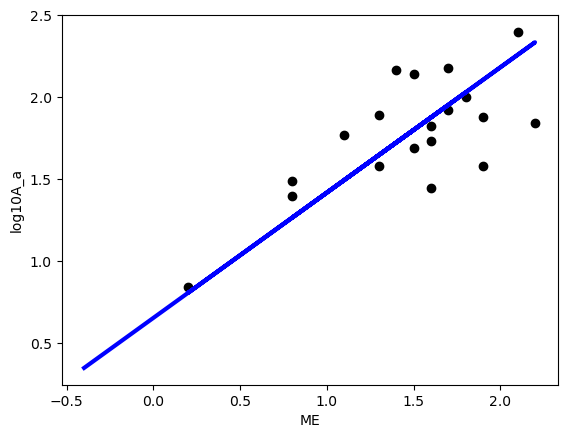


 Got 19 events
ME_s = 0.873 ME + 0.544
alt: ME = 1.14 ME_s - 0.623

 Got 19 events
ME = 0.801 ME_s + 0.00569
alt: ME_s = 1.25 ME - 0.0071

Average relationship:
ME_s = 1.06 ME + 0.268
alt: ME = 0.943 ME_s - 0.253
R-squared value: 0.7


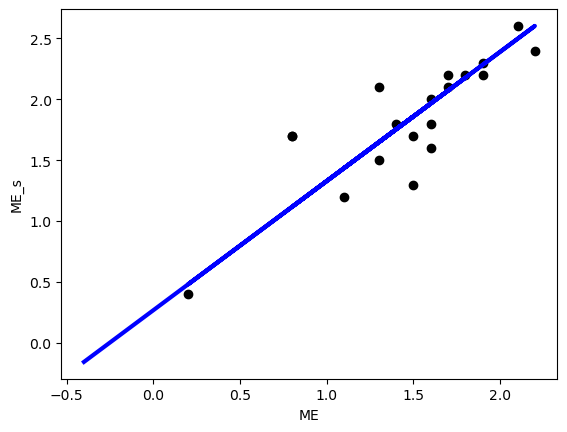


 Got 19 events
ME_a = 0.648 ME + 2.17
alt: ME = 1.54 ME_a - 3.34

 Got 19 events
ME = 0.902 ME_a - 1.34
alt: ME_a = 1.11 ME + 1.49

Average relationship:
ME_a = 0.878 ME + 1.83
alt: ME = 1.14 ME_a - 2.08
R-squared value: 0.584


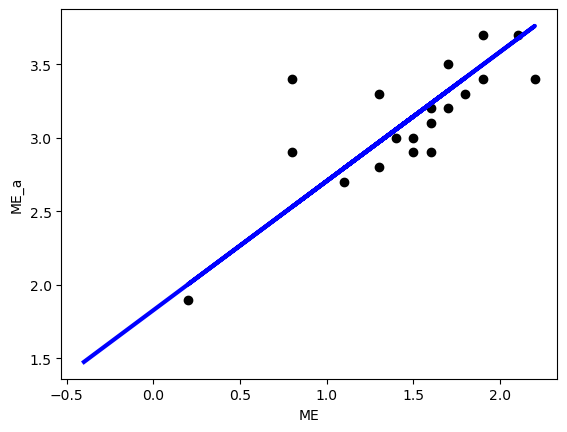


 Got 18 events
log10H = 0.218 ME + 3.76
alt: ME = 4.6 log10H - 17.3

 Got 18 events
ME = 1.74 log10H - 5.61
alt: log10H = 0.575 ME + 3.22

 Got 19 events
log10A_s = 0.733 log10DR - 0.0206
alt: log10DR = 1.36 log10A_s + 0.0281

 Got 19 events
log10DR = 0.483 log10A_s + 0.986
alt: log10A_s = 2.07 log10DR - 2.04

 Got 19 events
log10A_a = 0.927 log10DR + 0.378
alt: log10DR = 1.08 log10A_a - 0.408

 Got 19 events
log10DR = 0.659 log10A_a + 0.34
alt: log10A_a = 1.52 log10DR - 0.516

Average relationship:
log10A_a = 1.22 log10DR - 0.069
alt: log10DR = 0.818 log10A_a + 0.0564
R-squared value: 0.61


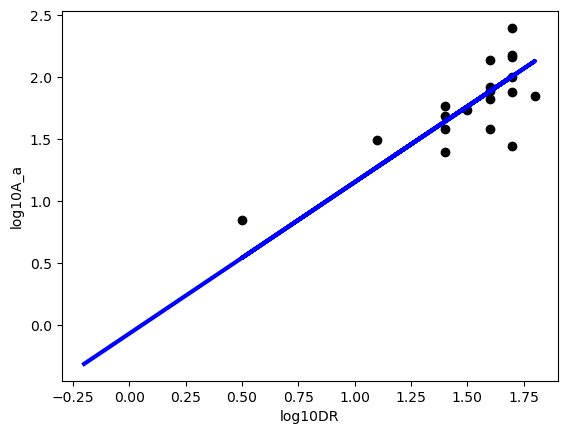


 Got 19 events
ME_s = 1.38 log10DR - 0.249
alt: log10DR = 0.726 ME_s + 0.181

 Got 19 events
log10DR = 0.466 ME_s + 0.656
alt: ME_s = 2.14 log10DR - 1.41

Average relationship:
ME_s = 1.76 log10DR - 0.828
alt: log10DR = 0.567 ME_s + 0.47
R-squared value: 0.642


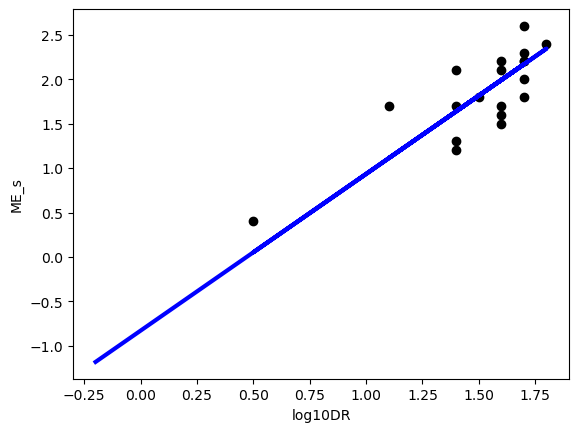


 Got 19 events
ME_a = 1.08 log10DR + 1.49
alt: log10DR = 0.925 ME_a - 1.38

 Got 19 events
log10DR = 0.555 ME_a - 0.223
alt: ME_a = 1.8 log10DR + 0.401

Average relationship:
ME_a = 1.44 log10DR + 0.946
alt: log10DR = 0.694 ME_a - 0.656
R-squared value: 0.6


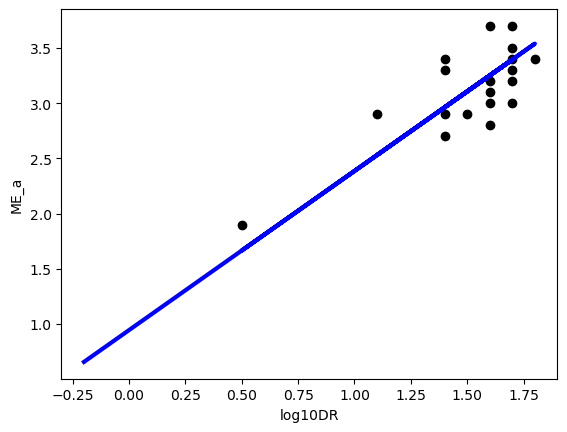


 Got 18 events
log10H = 0.273 log10DR + 3.66
alt: log10DR = 3.67 log10H - 13.4

 Got 18 events
log10DR = 0.803 log10H - 1.76
alt: log10H = 1.24 log10DR + 2.19

 Got 19 events
log10A_a = 0.594 log10A_s + 1.13
alt: log10A_s = 1.68 log10A_a - 1.9

 Got 19 events
log10A_s = 0.642 log10A_a - 0.0538
alt: log10A_a = 1.56 log10A_s + 0.0838

 Got 19 events
ME_s = 0.896 log10A_s + 0.858
alt: log10A_s = 1.12 ME_s - 0.958

 Got 19 events
log10A_s = 0.461 ME_s + 0.243
alt: ME_s = 2.17 log10A_s - 0.528

 Got 19 events
ME_a = 0.545 log10A_s + 2.53
alt: log10A_s = 1.84 ME_a - 4.64

 Got 19 events
log10A_s = 0.425 ME_a - 0.239
alt: ME_a = 2.35 log10A_s + 0.563

 Got 18 events
log10H = 0.232 log10A_s + 3.82
alt: log10A_s = 4.3 log10H - 16.5

 Got 18 events
log10A_s = 1.05 log10H - 3.18
alt: log10H = 0.955 log10A_s + 3.04

 Got 19 events
ME_s = 0.908 log10A_a + 0.218
alt: log10A_a = 1.1 ME_s - 0.24

 Got 19 events
log10A_a = 0.432 ME_s + 0.986
alt: ME_s = 2.31 log10A_a - 2.28

 Got 19 events
ME_a = 0.64

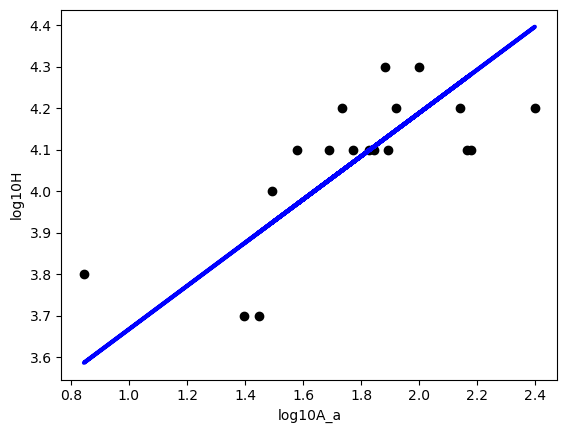


 Got 19 events
ME_a = 0.75 ME_s + 1.75
alt: ME_s = 1.33 ME_a - 2.33

 Got 19 events
ME_s = 1.14 ME_a - 1.72
alt: ME_a = 0.878 ME_s + 1.51

Average relationship:
ME_a = 0.814 ME_s + 1.63
alt: ME_s = 1.23 ME_a - 2.0
R-squared value: 0.854


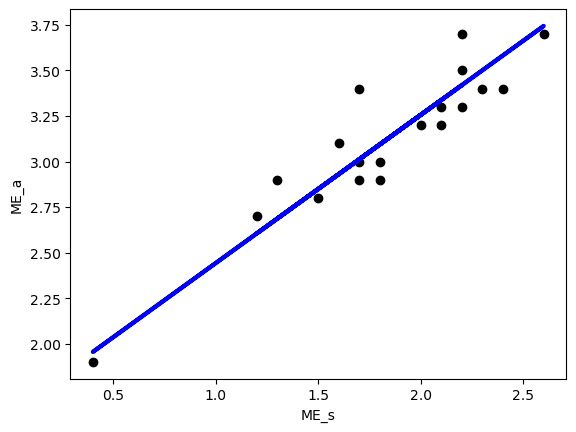


 Got 18 events
log10H = 0.148 ME_s + 3.81
alt: ME_s = 6.78 log10H - 25.8

 Got 18 events
ME_s = 1.27 log10H - 3.38
alt: log10H = 0.785 ME_s + 2.65

 Got 18 events
log10H = 0.12 ME_a + 3.7
alt: ME_a = 8.34 log10H - 30.9

 Got 18 events
ME_a = 0.686 log10H + 0.313
alt: log10H = 1.46 ME_a - 0.456


In [87]:
DFT.linearRegressMagnitudesBySubclass2ways(mergedDF, mag_columns=['ML', 'ME', 'log10DR', 'log10A_s', 'log10A_a', 'ME_s', 'ME_a', 'log10H'], \
                                      subclasses=[], \
                                      plot=True, print_stats=True)